In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("../restarts_dataframe/input.inp_650_0_cut1.0E-16.csv")

In [22]:
# REMOVES COLUMNS THAT HAVE STRONG CORR WITH ANY OTHERS

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
low_corr = df.drop(to_drop, axis=1, inplace=False)
low_corr.iloc[:,3:].corr().abs()

H1        H3       Li7       C12       C14      Cu67      As76  \
H1      1.000000  0.074537  0.236050  0.576524  0.255835  0.174227  0.167984   
H3      0.074537  1.000000  0.038187  0.189804  0.029277  0.018950  0.016474   
Li7     0.236050  0.038187  1.000000  0.181007  0.591057  0.489204  0.562082   
C12     0.576524  0.189804  0.181007  1.000000  0.183382  0.122484  0.137971   
C14     0.255835  0.029277  0.591057  0.183382  1.000000  0.601986  0.479816   
Cu67    0.174227  0.018950  0.489204  0.122484  0.601986  1.000000  0.076313   
As76    0.167984  0.016474  0.562082  0.137971  0.479816  0.076313  1.000000   
Br82    0.126210  0.005501  0.432193  0.098653  0.356190  0.038634  0.493374   
Rb84    0.333602  0.090543  0.106635  0.418223  0.078253  0.038715  0.088034   
Rb86    0.251428  0.026240  0.763812  0.185368  0.705243  0.357947  0.683070   
Sr89    0.011252  0.010241  0.455438  0.001862  0.295536  0.259525  0.114306   
Y88     0.297897  0.149683  0.131269  0.600988  0.134283  0.091397  0.111862   
Nb96    0.088979  0.018751  0.511280  0.078125  0.084786  0.228601  0.485427   
Mo94    0.466661  0.049823  0.423043  0.373595  0.713440  0.422574  0.359882   
Tc98    0.614727  0.065474  0.546280  0.550687  0.675788  0.447329  0.409863   
Tc100   0.200737  0.028428  0.663979  0.155255  0.571267  0.102708  0.717897   
Tc107   0.089770  0.016600  0.366794  0.078014  0.175318  0.468748  0.635743   
Rh102   0.583517  0.072305  0.296779  0.539566  0.360023  0.236566  0.240282   
Rh104   0.230688  0.032059  0.733354  0.178864  0.686684  0.225776  0.758678   
Cd113   0.106329  0.008509  0.010356  0.073113  0.573404  0.351384  0.216956   
Sn117m  0.087809  0.006703  0.030224  0.058858  0.419035  0.774295  0.106089   
Sb122   0.185909  0.024965  0.586486  0.144897  0.506408  0.088666  0.655387   
Te129m  0.197719  0.028293  0.826251  0.153149  0.397898  0.100019  0.606973   
I126    0.235928  0.040333  0.113190  0.207633  0.092194  0.011000  0.114547   
I128    0.179882  0.021028  0.560822  0.132102  0.488602  0.093326  0.622171   
Xe131m  0.106936  0.009236  0.031189  0.075863  0.481583  0.624876  0.064569   
Xe135   0.230917  0.027197  0.715315  0.166757  0.744139  0.896628  0.293509   
Cs132   0.173127  0.043482  0.071286  0.177415  0.051535  0.023182  0.078565   
Cs134m  0.201720  0.025677  0.659768  0.158431  0.572307  0.115558  0.714618   
Cs136   0.243743  0.029442  0.790307  0.179804  0.717478  0.285349  0.729482   
Ce138   0.071659  0.723109  0.033185  0.164073  0.042689  0.029906  0.022591   
Pr144m  0.155527  0.028678  0.769874  0.126482  0.321772  0.107426  0.605941   
Pm146   0.469363  0.038129  0.518471  0.350974  0.679371  0.437453  0.406918   
Pm148   0.215862  0.032404  0.762744  0.166586  0.557636  0.137064  0.743046   
Pm148m  0.256871  0.036015  0.893099  0.194018  0.696093  0.447125  0.676228   
Sm149   0.183435  0.027347  0.441560  0.139898  0.694721  0.157354  0.560552   
Sm151   0.068659  0.016128  0.641472  0.055976  0.039144  0.020239  0.233783   
Sm153   0.143758  0.024957  0.498896  0.116391  0.373066  0.198054  0.679883   
Eu151   0.142644  0.028409  0.830777  0.110710  0.198445  0.404809  0.296481   
Eu152   0.189457  0.034385  0.916762  0.146847  0.341766  0.358994  0.515255   
Gd155   0.228544  0.024667  0.640649  0.159804  0.805720  0.797937  0.245344   
Gd157   0.158785  0.018377  0.541435  0.121537  0.342136  0.190005  0.462556   
Th234   0.153201  0.028558  0.851372  0.119458  0.310129  0.205630  0.386385   
U234    0.341759  0.040637  0.760378  0.244449  0.829954  0.550536  0.537233   
U237    0.201363  0.024017  0.656481  0.151069  0.510654  0.099104  0.694314   
U239    0.033873  0.002828  0.041813  0.022967  0.201866  0.757400  0.341233   

            Br82      Rb84      Rb86  ...     Sm151     Sm153     Eu151  \
H1      0.126210  0.333602  0.251428  ...  0.068659  0.143758  0.142644   
H3      0.005501  0.090543  0.026240  ...  0.016128  0.024957  0.028409   
Li7     0.432193  0.106635  

In [12]:
df = pd.read_csv("../restarts_dataframe/input.inp_650_0_cut1.0E-16.csv")
trimmed_df = df.iloc[:,4:]
columns = trimmed_df.columns
been_removed = dict.fromkeys(columns,0)

In [13]:
# compares columns that haven't yet been removed
# if the columns are highly correlated (corr >= 0.90) then the column with a lower mean absolute value is deleted
# the higher column is kept. 
correlations = []
strong_corr = pd.DataFrame()
for column_1 in columns:
    if been_removed[column_1] == 0:
        for column_2 in columns:
            if been_removed[column_2] == 0:
                if column_1 != column_2:
                    corr = trimmed_df[column_1].corr(trimmed_df[column_2])
                    if corr > 0.90 or corr < -0.90:
                        col_1_val = np.mean(np.absolute(trimmed_df[column_1]))
                        col_2_val = np.mean(np.absolute(trimmed_df[column_2]))
                        if col_1_val > col_2_val:
                            been_removed[column_2] = 1
                        else:
                            been_removed[column_1] = 1


                    

In [14]:
filtered_corr = pd.DataFrame()
for isotope in been_removed:
    if been_removed[isotope] == 0:
        filtered_corr[isotope] = trimmed_df[isotope]
filtered_corr

H1            H3           C12       O16          As76  \
0      2.652071e-10  1.333037e-13  2.617954e-10  0.046474  5.251378e-13   
1      3.003508e-12  7.973046e-14  5.083071e-12  0.046474  5.982030e-13   
2      5.765709e-12  1.010674e-13  4.318388e-13  0.046474  4.738024e-13   
3      1.284086e-11  1.195656e-13  1.944309e-11  0.046474  7.950764e-13   
4      1.026342e-11  1.032943e-13  2.585649e-12  0.046474  6.004781e-13   
...             ...           ...           ...       ...           ...   
15385  1.127557e-13  4.869046e-14  7.468125e-14  0.046474  2.630396e-13   
15386  1.066974e-13  4.123013e-14  7.016165e-14  0.046474  9.251516e-14   
15387  2.494181e-12  1.040380e-13  3.184966e-13  0.046474  2.464020e-13   
15388  3.739966e-14  2.873956e-14  3.522271e-14  0.046474  1.178602e-13   
15389  2.947660e-10  1.183552e-13  1.639956e-10  0.046474  1.170224e-12   

               Br82          Rb84           Y88      Zr95      Nb95  ...  \
0      9.224506e-11  9.690294e-14  3.877304e-13  0.000019  0.000010  ...   
1      9.200208e-11  9.017354e-15  3.310548e-14  0.000026  0.000013  ...   
2      9.496490e-11  1.027450e-14  6.093662e-14  0.000022  0.000012  ...   
3      1.303574e-10  1.283567e-14  9.205694e-14  0.000019  0.000010  ...   
4      1.125297e-10  1.040462e-14  7.791423e-14  0.000019  0.000010  ...   
...             ...           ...           ...       ...       ...  ...   
15385  3.072966e-11  6.072834e-15  7.344230e-15  0.000014  0.000003  ...   
15386  3.170300e-11  5.357632e-15  5.718777e-15  0.000012  0.000003  ...   
15387  4.203828e-11  8.664114e-15  4.181949e-14  0.000024  0.000013  ...   
15388  1.233775e-11  4.061927e-15  4.063083e-15  0.000010  0.000002  ...   
15389  1.804061e-10  4.531335e-13  6.501254e-14  0.000018  0.000011  ...   

          Pr143        Pr144m         Sm149         Sm151         Sm153  \
0      0.000004  1.177346e-11  2.504240e-07  6.605851e-07  3.779007e-08   
1      0.000005  1.342387e-11  2.621307e-07  6.891675e-07  3.759467e-08   
2      0.000004  1.377686e-11  2.360020e-07  7.030506e-07  5.251575e-08   
3      0.000004  1.512768e-11  2.123505e-07  7.151015e-07  9.489441e-08   
4      0.000003  1.381177e-11  1.973387e-07  6.475527e-07  6.001973e-08   
...         ...           ...           ...           ...           ...   
15385  0.000005  8.673241e-12  2.793899e-07  6.140727e-07  2.811045e-08   
15386  0.000005  7.513394e-12  2.827491e-07  5.611927e-07  2.548735e-08   
15387  0.000004  1.214126e-11  2.668938e-07  6.879336e-07  3.903137e-08   
15388  0.000005  6.161394e-12  3.010015e-07  4.803255e-07  2.176617e-08   
15389  0.000003  1.304228e-11  2.297098e-07  7.107187e-07  5.873909e-08   

              Eu156         Gd155         Gd157          U237     Np239  
0      6.450595e-08  7.480226e-10  9.981379e-10  1.515833e-07  0.000002  
1      5.887657e-08  5.095937e-10  8.102667e-10  1.569864e-07  0.000002  
2      8.016285e-08  7.479999e-10  9.931147e-10  2.945594e-07  0.000002  
3      1.324616e-07  1.062166e-09  1.343546e-09  2.970335e-07  0.000002  
4      1.112719e-07  1.068947e-09  1.026444e-09  2.640029e-07  0.000002  
...             ...           ...           ...           ...       ...  
15385  2.983031e-08  2.338731e-10  8.787725e-10  3.678580e-08  0.000002  
15386  2.407334e-08  2.078869e-10  8.627012e-10  2.041963e-08  0.000002  
15387  5.970763e-08  6.406792e-10  8.483192e-10  1.525828e-07  0.000001  
15388  1.976792e-08  1.620514e-10  7.816149e-10  4.957703e-08  0.000002  
15389  7.939048e-08  9.719579e-10  1.195787e-09  3.429213e-07  0.000003  

[15390 rows x 35 columns]

In [20]:
low_filtered_corr = filtered_corr.iloc[:,0:10].corr()
low_unfil_corr = low_corr.iloc[:,10:20].corr()
low_unfil_corr

NameError: name 'filtered_corr' is not defined

<AxesSubplot:>

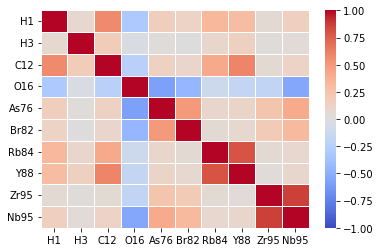

In [27]:
# Create a heatmap using Seaborn
low_corr
import seaborn as sns
sns.heatmap(low_corr, cmap='coolwarm', annot=False, linewidths=.5, vmin=-1, vmax = 1)

<AxesSubplot:>

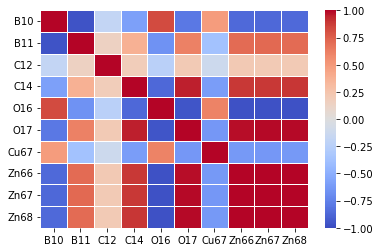

In [29]:
sns.heatmap(high_corr, cmap='coolwarm', annot=False, linewidths=.5, vmin=-1, vmax = 1)

In [18]:
import plotly.graph_objects as go

In [19]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

In [1]:
fig = go.Figure(data=go.Heatmap(df_to_plotly(low_corr)))
fig.show()
fig = go.Figure(data=go.Heatmap(df_to_plotly(high_corr)))
fig.show()

NameError: name 'go' is not defined

In [21]:
import plotly.figure_factory as ff

np.random.seed(1)

z = np.random.randn(20, 20)
z_text = np.around(z, decimals=2) # Only show rounded value (full value on hover)

fig = ff.create_annotated_heatmap(z, annotation_text=z_text, colorscale='Greys',
                                  hoverinfo='z')

# Make text size smaller
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8

fig.show()

In [129]:
# change back to 5 when trial done

cross_corr_table = df.iloc[:,400:].corr().abs()

In [130]:
edge_table = cross_corr_table
edge_table

Sm148     Sm149     Sm150     Sm151     Sm152     Sm153     Sm154  \
Sm148  1.000000  0.697480  0.944715  0.021166  0.931204  0.423279  0.956104   
Sm149  0.697480  1.000000  0.677121  0.198248  0.677796  0.624848  0.682431   
Sm150  0.944715  0.677121  1.000000  0.236322  0.998461  0.501759  0.999098   
Sm151  0.021166  0.198248  0.236322  1.000000  0.243119  0.246822  0.218317   
Sm152  0.931204  0.677796  0.998461  0.243119  1.000000  0.499325  0.996155   
...         ...       ...       ...       ...       ...       ...       ...   
Pu239  0.775358  0.500226  0.911464  0.497425  0.910826  0.528110  0.902680   
Pu240  0.974267  0.687103  0.975969  0.128222  0.966498  0.483235  0.982404   
Pu241  0.978692  0.666351  0.925952  0.045988  0.908067  0.450714  0.938448   
Pu242  0.935529  0.630304  0.794577  0.093379  0.773860  0.306751  0.818588   
Am241  0.959198  0.643261  0.834262  0.071047  0.813712  0.325249  0.855993   

          Sm155     Sm156     Sm157  ...      U239     Np237     Np238  \
Sm148  0.333336  0.161254  0.052448  ...  0.180099  0.988167  0.857274   
Sm149  0.185724  0.317116  0.459048  ...  0.148038  0.672378  0.750255   
Sm150  0.303555  0.108720  0.119967  ...  0.150025  0.948614  0.846510   
Sm151  0.106740  0.184756  0.243859  ...  0.242191  0.073526  0.093898   
Sm152  0.303379  0.108942  0.118655  ...  0.157248  0.933403  0.833288   
...         ...       ...       ...  ...       ...       ...       ...   
Pu239  0.215065  0.011198  0.211947  ...  0.019944  0.823538  0.765238   
Pu240  0.302365  0.111613  0.115824  ...  0.144852  0.983598  0.877828   
Pu241  0.291305  0.113305  0.103607  ...  0.128561  0.988247  0.879095   
Pu242  0.306911  0.174170  0.001195  ...  0.189560  0.907378  0.758908   
Am241  0.326701  0.183786  0.002384  ...  0.195156  0.939266  0.785257   

          Np239     Pu238     Pu239     Pu240     Pu241     Pu242     Am241  
Sm148  0.176188  0.970051  0.775358  0.974267  0.978692  0.935529  0.959198  
Sm149  0.139222  0.653871  0.500226  0.687103  0.666351  0.630304  0.643261  
Sm150  0.144792  0.853144  0.911464  0.975969  0.925952  0.794577  0.834262  
Sm151  0.255108  0.054044  0.497425  0.128222  0.045988  0.093379  0.071047  
Sm152  0.152247  0.832830  0.910826  0.966498  0.908067  0.773860  0.813712  
...         ...       ...       ...       ...       ...       ...       ...  
Pu239  0.011941  0.656595  1.000000  0.877957  0.805719  0.576535  0.633031  
Pu240  0.140205  0.914252  0.877957  1.000000  0.977896  0.864666  0.902686  
Pu241  0.123823  0.952668  0.805719  0.977896  1.000000  0.913673  0.946771  
Pu242  0.186774  0.986463  0.576535  0.864666  0.913673  1.000000  0.993595  
Am241  0.192212  0.993015  0.633031  0.902686  0.946771  0.993595  1.000000  

[71 rows x 71 columns]

In [132]:
adj_list = dict.fromkeys(edge_table.columns, [])
names = edge_table.columns

In [95]:
adj_list['H1'] = adj_list['H1'] + ["H3"]
adj_list

{'H1': ['H3'],
 'H3': [],
 'He4': [],
 'Li7': [],
 'Be10': [],
 'B10': [],
 'B11': [],
 'C12': [],
 'C14': [],
 'O16': [],
 'O17': [],
 'Cu67': [],
 'Zn66': [],
 'Zn67': [],
 'Zn68': [],
 'Zn70': [],
 'Zn72': [],
 'Ga69': [],
 'Ga71': [],
 'Ga72': [],
 'Ge72': [],
 'Ge73': [],
 'Ge74': [],
 'Ge76': [],
 'Ge77': [],
 'Ge78': [],
 'As75': [],
 'As76': [],
 'As77': [],
 'As78': [],
 'As79': [],
 'As81': [],
 'Se76': [],
 'Se77': [],
 'Se78': [],
 'Se79': [],
 'Se79m': [],
 'Se80': [],
 'Se81': [],
 'Se81m': [],
 'Se82': [],
 'Se83': [],
 'Se84': [],
 'Se85': [],
 'Se86': [],
 'Br79': [],
 'Br81': [],
 'Br82': [],
 'Br83': [],
 'Br84': [],
 'Br84m': [],
 'Br85': [],
 'Br86': [],
 'Br87': [],
 'Br88': [],
 'Kr80': [],
 'Kr81': [],
 'Kr82': [],
 'Kr83': [],
 'Kr83m': [],
 'Kr84': [],
 'Kr85': [],
 'Kr85m': [],
 'Kr86': [],
 'Kr87': [],
 'Kr88': [],
 'Kr89': [],
 'Kr90': [],
 'Kr91': [],
 'Rb83': [],
 'Rb84': [],
 'Rb85': [],
 'Rb86': [],
 'Rb87': [],
 'Rb88': [],
 'Rb89': [],
 'Rb90': [],
 '

In [133]:
k = 0
j = 0

for each_column in edge_table:
    
    for i in range(len(edge_table.columns)):
        if(j % 10000 == 0):    
            print(j)
            print(each_column)
        j+=1
        if edge_table[each_column][i] > 0.90:
            adj_list[each_column] = adj_list[each_column] + [names[i]]
            #adj_list[names[i]].append(each_column)
            #edge_table.loc[:, each_column][i] = 1
        #else:
            #edge_table.loc[:, each_column][i] = 0
    k += 1
    
    

0
Sm148


In [134]:
adj_list

{'Sm148': ['Sm148',
  'Sm150',
  'Sm152',
  'Sm154',
  'Eu153',
  'Eu154',
  'Eu155',
  'Gd152',
  'Gd154',
  'Gd156',
  'Gd158',
  'Gd160',
  'Tb158',
  'Tb159',
  'Tb160',
  'Dy160',
  'Dy161',
  'Dy162',
  'Dy163',
  'Dy164',
  'Ho165',
  'Ho166m',
  'Er166',
  'Er167',
  'Er168',
  'Er170',
  'Tm169',
  'Tm171',
  'Yb172',
  'Th231',
  'Th232',
  'U232',
  'U235',
  'U236',
  'U238',
  'Np237',
  'Pu238',
  'Pu240',
  'Pu241',
  'Pu242',
  'Am241'],
 'Sm149': ['Sm149'],
 'Sm150': ['Sm148',
  'Sm150',
  'Sm152',
  'Sm154',
  'Eu153',
  'Eu154',
  'Eu155',
  'Eu156',
  'Gd152',
  'Gd156',
  'Gd158',
  'Gd160',
  'Tb158',
  'Tb159',
  'Tb160',
  'Dy161',
  'Dy162',
  'Dy163',
  'Dy164',
  'Ho165',
  'Er166',
  'Er167',
  'Er168',
  'Er170',
  'Tm169',
  'Tm171',
  'Yb172',
  'Th231',
  'Th232',
  'Pa231',
  'U232',
  'U235',
  'U236',
  'U238',
  'Np237',
  'Pu239',
  'Pu240',
  'Pu241'],
 'Sm151': ['Sm151', 'Th234', 'Pa234'],
 'Sm152': ['Sm148',
  'Sm150',
  'Sm152',
  'Sm154',
  'Eu

In [75]:
edge_table["H1"][0]

1.0

In [14]:
import networkx as nx
#from pyvis.network import Network

In [23]:
attempt_graph = nx.Graph()
G = nx.Graph()
G.add_nodes_from(["a", "b", "c", "d", "e"])
G.add_edge("a", "b")
G.add_edge("c", "d")
G.add_edge("a", "d")
G.add_edge("c", "e")
G.add_edge("c", "b")

In [18]:
pip install pyvis

     |████████████████████████████████| 756 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 15.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [113]:
from pyvis.network import Network

In [24]:
net = Network(notebook=True)
net.from_nx(G)
net.show("example.html")

example.html


In [136]:
attempt_graph = nx.Graph(adj_list)
net = Network(notebook=True)
net.from_nx(attempt_graph)
net.show_buttons(filter_=["physics"])
net.show("trial.html")

trial.html


In [22]:
# performing PCA, with an output of 10 components, on all of the isotopes. 
# This therefore takes 10 linear combinations of all ~500 isotopes

scaler = StandardScaler()
df_scaled = scaler.fit_transform(filtered_corr) # scaling the components doesn't account for the magnitude of them
pca = PCA(n_components=10)
pca.fit(df_scaled) # can use df_scaled here too
df_pca = pca.transform(df_scaled) # can use df_scaled here too
explained_variance = pca.explained_variance_ratio_
loadings = pca.components_

In [23]:
# pca_df is the 10 resulting values.
# loadings_df is the proporitons going to each linear combination for each isotope
# which is slightly more relevant to this work
pca_df = pd.DataFrame(df_pca)
first_col = pca_df[pca_df.columns[0]]
loadings_df = pd.DataFrame(loadings)
loadings_df
pca_df


0             1             2             3             4  \
0     -4.120902e-08 -3.403710e-08  9.896748e-09  2.318314e-08 -8.592867e-10   
1     -4.336210e-01 -1.588030e+00  4.694615e-01 -8.106973e-01  8.796996e-03   
2      1.709523e+00 -1.207604e+00 -6.063357e-01 -6.368441e-01  1.483164e-01   
3      7.378287e+00 -1.374148e+00 -2.215241e+00  1.146111e+00  1.306210e-01   
4      3.072702e+00  6.406349e-01 -1.905609e+00  2.123828e-02  1.941032e-01   
...             ...           ...           ...           ...           ...   
15385 -4.665478e+00 -1.354043e+00 -8.596522e-02  1.431709e+00 -4.141020e-02   
15386 -5.404358e+00 -7.805428e-01 -3.352751e-01  1.798568e+00 -4.939112e-02   
15387 -9.593071e-01 -5.021172e-01  2.819801e-01 -1.757093e+00  1.205515e-01   
15388 -6.422516e+00  4.740264e-02 -4.988881e-01  1.908721e+00 -6.132761e-02   
15389  5.641961e+00  3.043596e-01 -2.691855e-01  1.711608e+00 -5.130338e-01   

                  5             6             7             8             9  
0     -6.160576e-11 -5.883842e-09  1.215373e-08  1.101192e-08 -1.849034e-08  
1      3.027839e-01 -1.580301e+00  4.021914e-02  5.487195e-03  3.292565e-01  
2      4.218059e-01 -3.680630e-01  3.612871e-02 -3.655702e-01 -5.970964e-02  
3      2.704782e-01  1.812295e+00 -3.448351e-01 -1.224824e+00 -2.068027e-01  
4      5.324838e-01 -3.584870e-01 -2.678411e-01 -7.834040e-01  6.966403e-01  
...             ...           ...           ...           ...           ...  
15385 -2.337602e-01  9.838976e-01 -2.906656e-01 -3.371897e-01  6.434205e-01  
15386 -2.348482e-01  1.015571e+00 -1.821401e-01 -1.659786e-01  4.847397e-01  
15387  4.286948e-01 -1.323551e+00  9.252634e-03 -2.979318e-01 -1.142742e-01  
15388 -1.963176e-01  1.013917e+00 -7.109283e-02 -8.039412e-02  1.881084e-01  
15389  7.664890e-01  1.152638e+00  1.721457e-01  6.561085e-01 -1.730253e+00  

[15390 rows x 10 columns]

<AxesSubplot:>

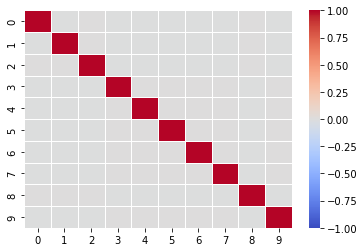

In [30]:
pca_df
corr = pca_df.corr()
corr
import seaborn as sns
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=.5, vmin=-1, vmax = 1)

0             1             2             3             4  \
0  1.000000e+00  4.244256e-17  2.268315e-17  3.045134e-16 -2.892095e-16   
1  4.244256e-17  1.000000e+00 -2.351325e-14 -1.634752e-16 -6.648039e-16   
2  2.268315e-17 -2.351325e-14  1.000000e+00  9.443711e-15 -1.167151e-15   
3  3.045134e-16 -1.634752e-16  9.443711e-15  1.000000e+00 -1.084153e-16   
4 -2.892095e-16 -6.648039e-16 -1.167151e-15 -1.084153e-16  1.000000e+00   
5  2.093313e-16 -7.768669e-16 -1.099974e-16  1.699972e-16  1.613252e-16   
6 -1.442990e-16 -4.654968e-16 -5.536186e-16  1.147305e-16  6.629442e-16   
7  3.869452e-17  6.303578e-16 -1.638326e-15  4.039802e-16  1.028765e-15   
8 -5.451477e-16 -8.547839e-17  4.918642e-16 -4.649338e-15 -1.027771e-14   
9  8.931353e-17  8.554743e-16 -6.539795e-16  2.158917e-14  4.223394e-14   

              5             6             7             8             9  
0  2.093313e-16 -1.442990e-16  3.869452e-17 -5.451477e-16  8.931353e-17  
1 -7.768669e-16 -4.654968e-16  6.303578e-16 -8.547839e-17  8.554743e-16  
2 -1.099974e-16 -5.536186e-16 -1.638326e-15  4.918642e-16 -6.539795e-16  
3  1.699972e-16  1.147305e-16  4.039802e-16 -4.649338e-15  2.158917e-14  
4  1.613252e-16  6.629442e-16  1.028765e-15 -1.027771e-14  4.223394e-14  
5  1.000000e+00  3.545204e-14  5.916816e-14 -6.774549e-13  3.020914e-12  
6  3.545204e-14  1.000000e+00  5.044060e-12 -5.362153e-11  2.430252e-10  
7  5.916816e-14  5.044060e-12  1.000000e+00 -9.626291e-11  4.202164e-10  
8 -6.774549e-13 -5.362153e-11 -9.626291e-11  1.000000e+00 -4.420161e-09  
9  3.020914e-12  2.430252e-10  4.202164e-10 -4.420161e-09  1.000000e+00

In [5]:
columns = df.columns
columns = columns[4:]
correlations = []
strong_corr = pd.DataFrame()
for column in columns:
    corr = df['Burnup [MWd/kg_HM]'].corr(df[column])
    if corr > 0.95 or corr < -0.95 or True:
        correlations.append(corr)
        strong_corr[column] = df[column]
    
    

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strong_corr[column] = df[column]
/var/folders/8y/0jc3hfkn249gd1k0_nhq84_80000gn/T/ipykernel_52165/2921219910.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [6]:
strong_corr.head()

Lost            H1            H3           He4           Li7  \
0  1.972125e-11  2.652071e-10  1.333037e-13  1.024998e-07  1.479332e-08   
1  1.709317e-11  3.003508e-12  7.973046e-14  7.239218e-08  1.603065e-08   
2  2.446436e-11  5.765709e-12  1.010674e-13  1.222617e-07  1.755311e-08   
3  3.175177e-11  1.284086e-11  1.195656e-13  1.939292e-07  1.807779e-08   
4  3.225463e-11  1.026342e-11  1.032943e-13  1.654041e-07  1.811578e-08   

           Be10           B10           B11           C12           C14  ...  \
0  1.765340e-14  3.468501e-09  7.468545e-08  2.617954e-10  8.626619e-13  ...   
1  1.543716e-14  2.231162e-09  7.468568e-08  5.083071e-12  3.702372e-13  ...   
2  2.031058e-14  7.082482e-10  7.468576e-08  4.318388e-13  9.152824e-13  ...   
3  2.482882e-14  1.832002e-10  7.468568e-08  1.944309e-11  1.866775e-12  ...   
4  2.042912e-14  1.451731e-10  7.468566e-08  2.585649e-12  1.950101e-12  ...   

           U239     Np237         Np238     Np239         Pu238     Pu239  \
0  1.189409e-08  0.000003  5.013841e-09  0.000002  2.492272e-07  0.000086   
1  1.061353e-08  0.000001  2.152902e-09  0.000002  4.602038e-08  0.000068   
2  1.449669e-08  0.000003  5.302775e-09  0.000002  2.089629e-07  0.000113   
3  1.695280e-08  0.000008  2.148582e-08  0.000002  8.299936e-07  0.000146   
4  1.235170e-08  0.000006  1.012233e-08  0.000002  5.445580e-07  0.000124   

      Pu240         Pu241         Pu242         Am241  
0  0.000015  4.133187e-06  6.295303e-07  6.858208e-08  
1  0.000008  9.830202e-07  5.867565e-08  6.587315e-09  
2  0.000020  5.273022e-06  5.696759e-07  6.492170e-08  
3  0.000035  1.370971e-05  2.277913e-06  2.399111e-07  
4  0.000032  9.832313e-06  1.687988e-06  1.801877e-07  

[5 rows x 467 columns]

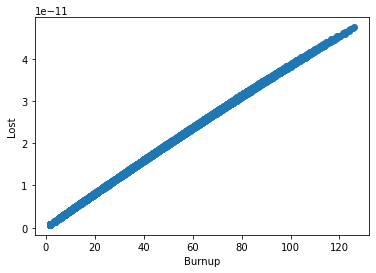

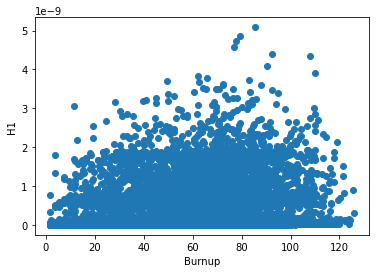

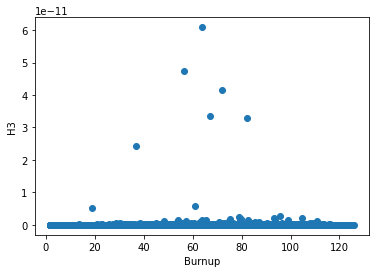

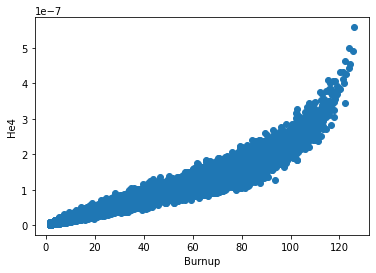

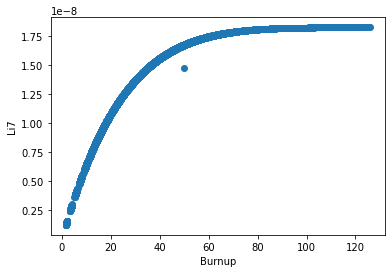

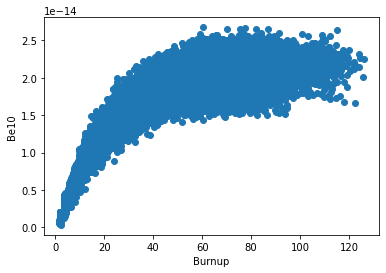

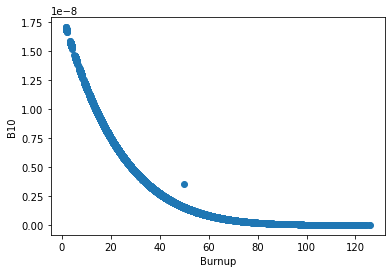

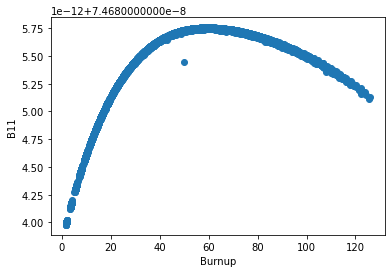

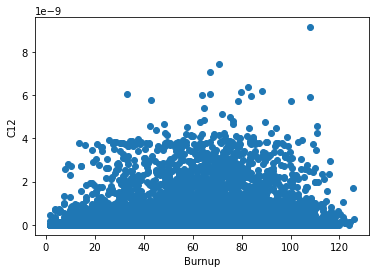

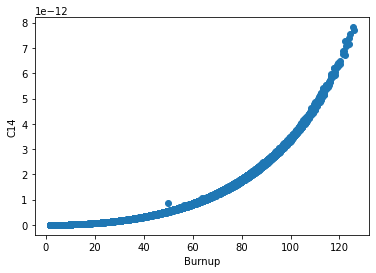

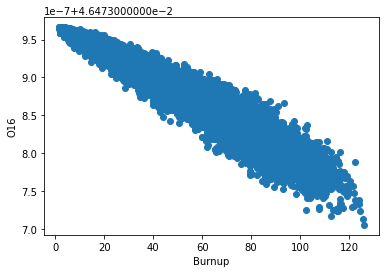

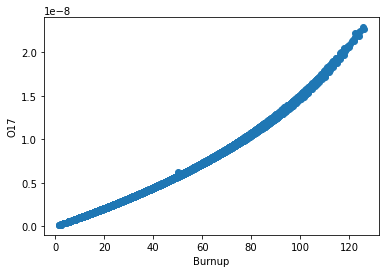

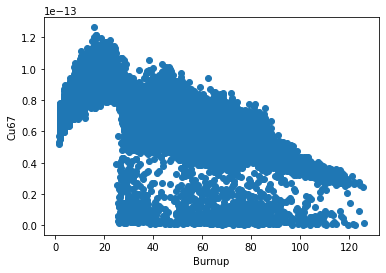

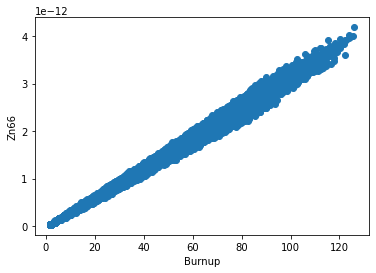

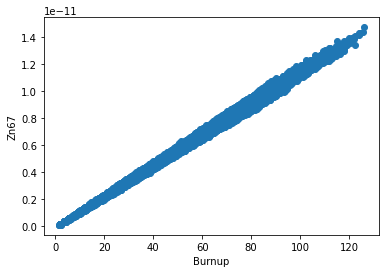

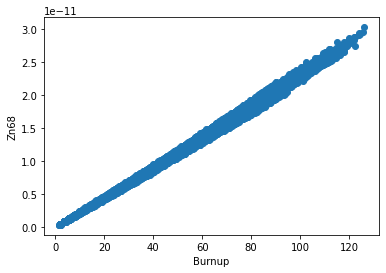

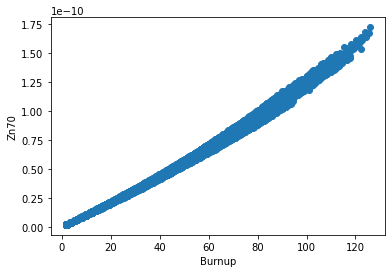

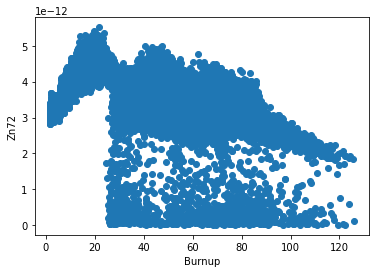

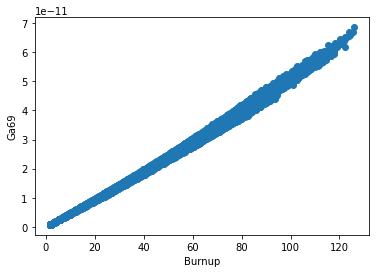

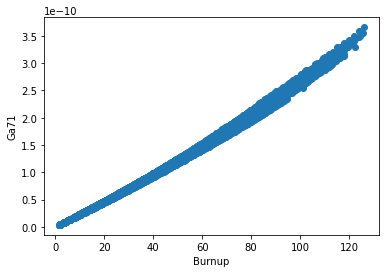

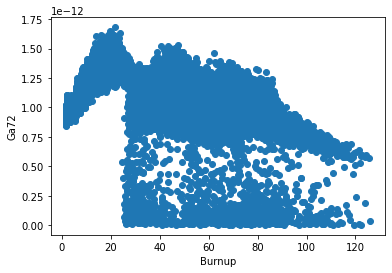

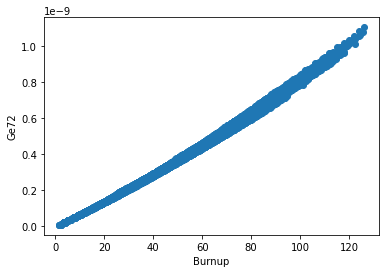

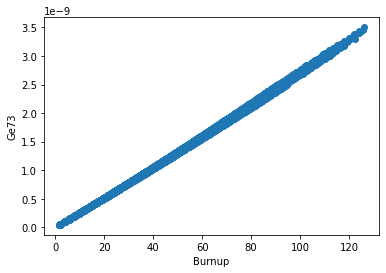

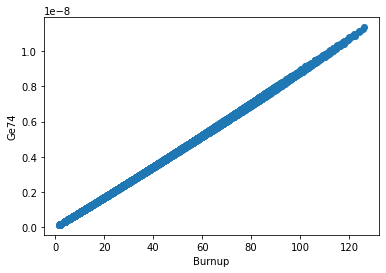

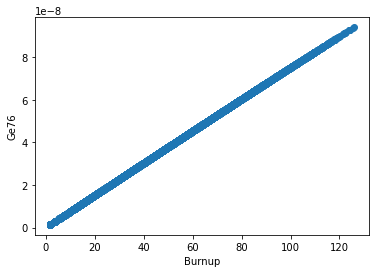

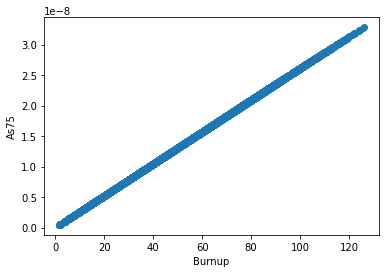

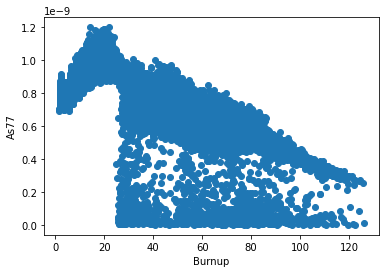

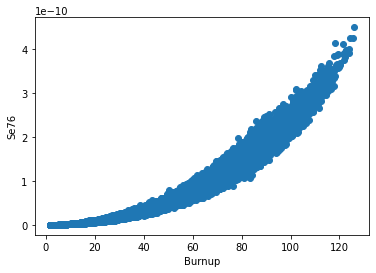

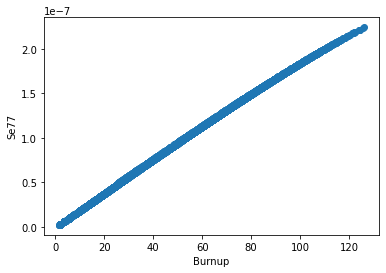

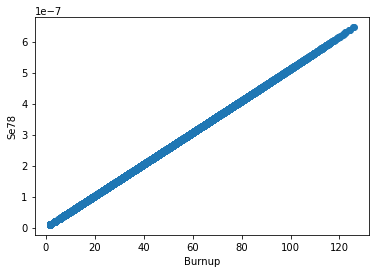

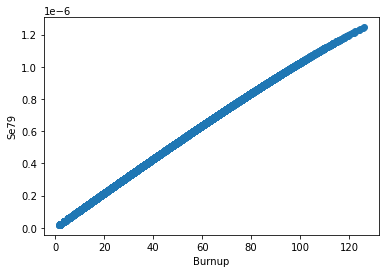

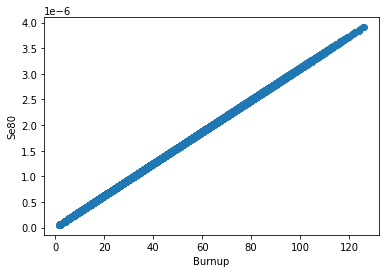

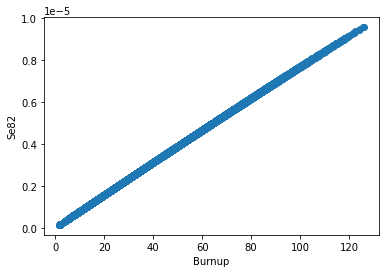

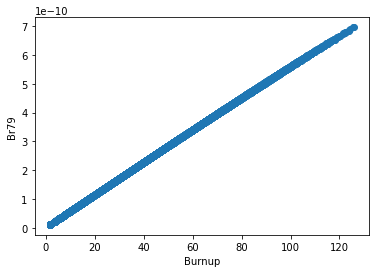

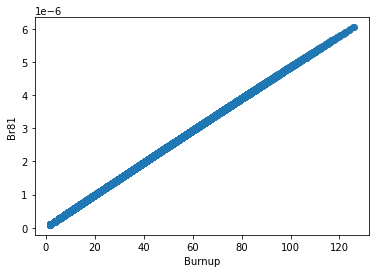

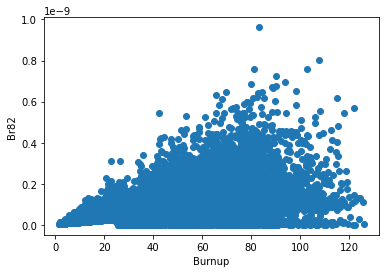

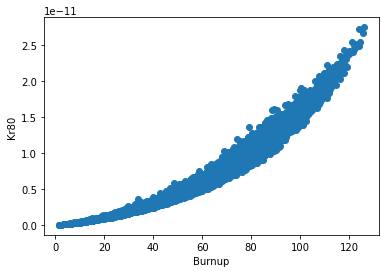

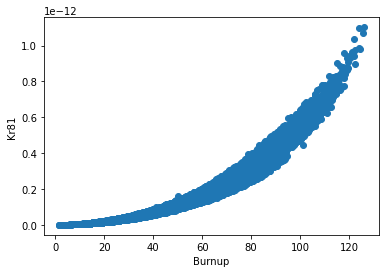

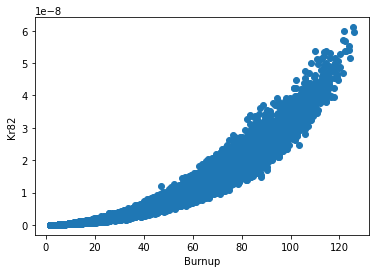

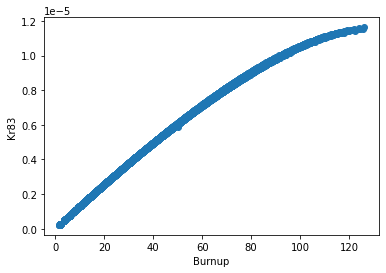

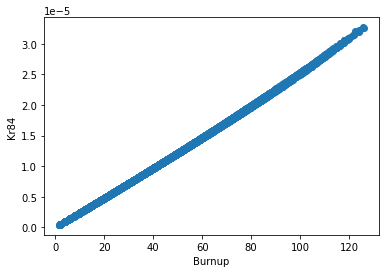

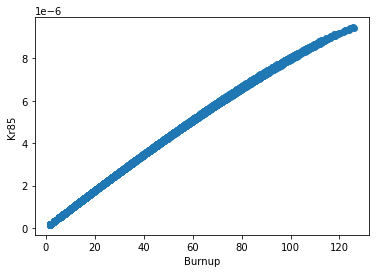

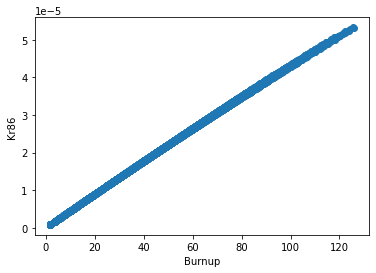

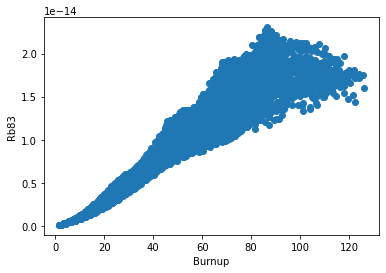

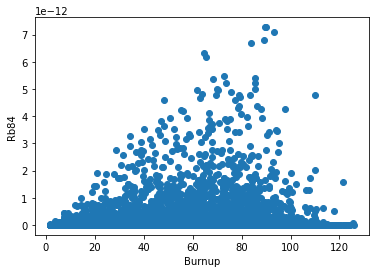

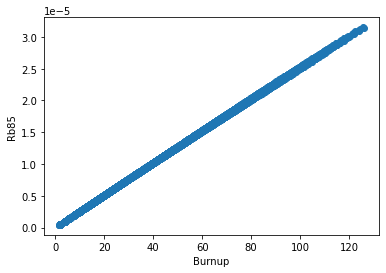

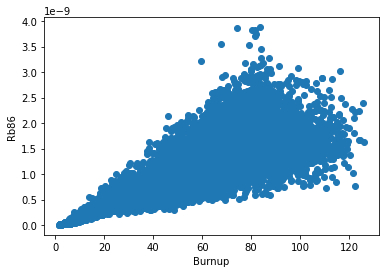

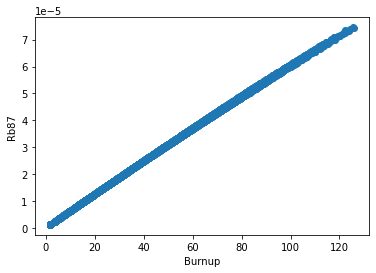

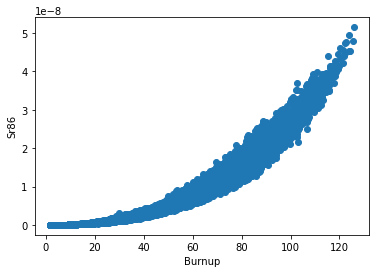

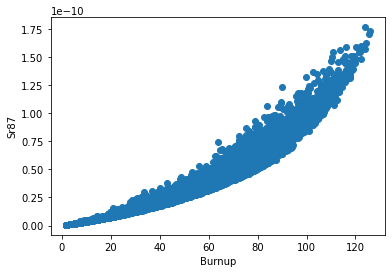

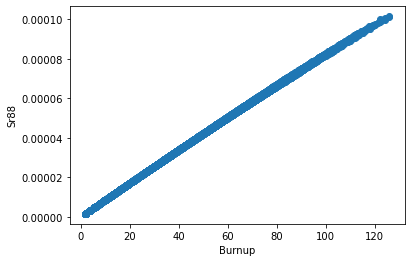

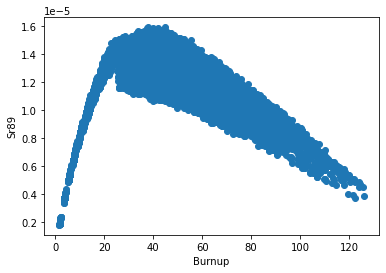

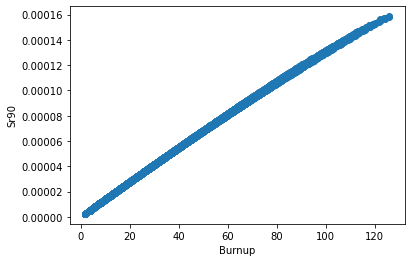

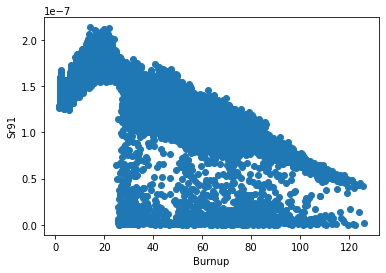

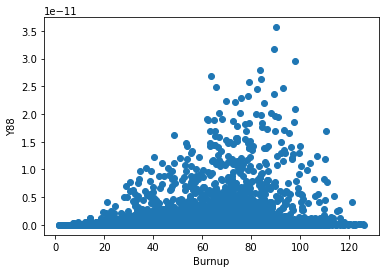

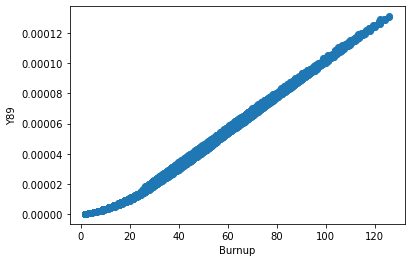

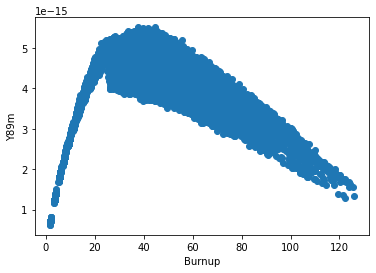

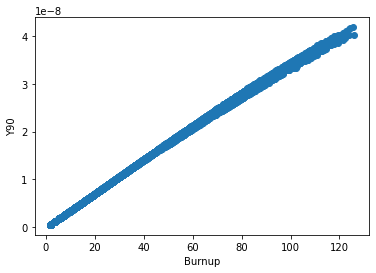

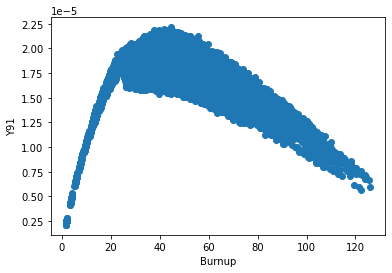

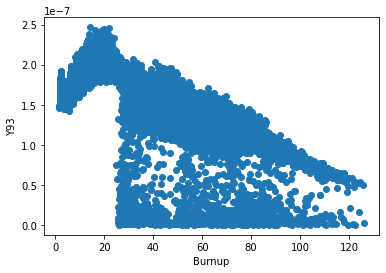

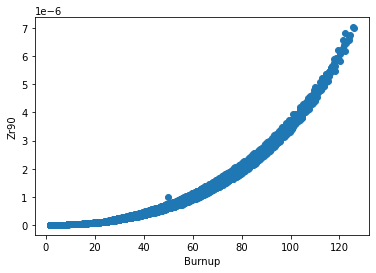

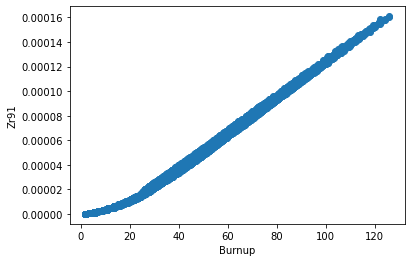

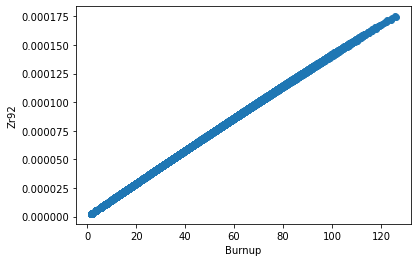

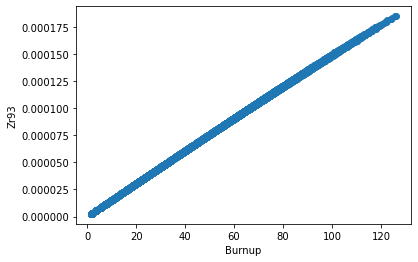

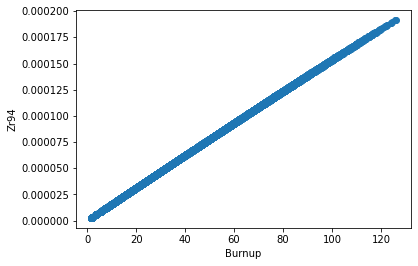

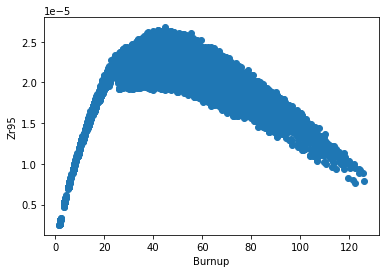

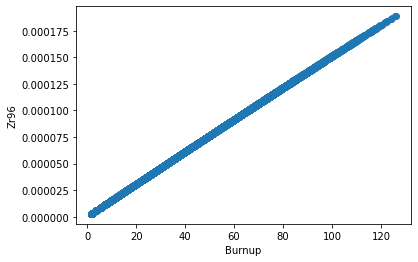

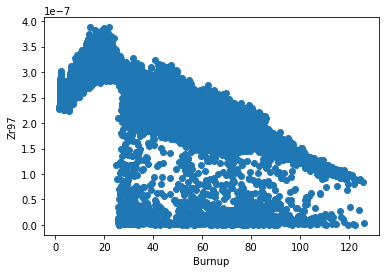

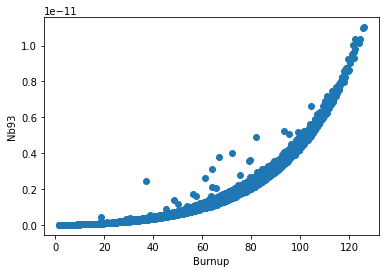

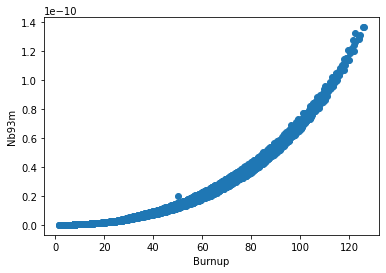

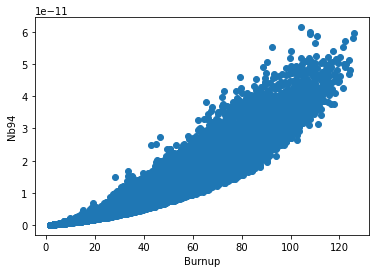

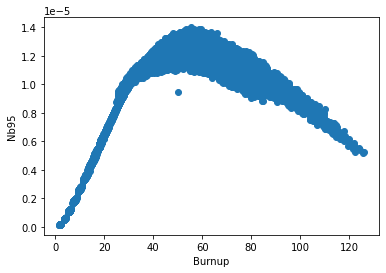

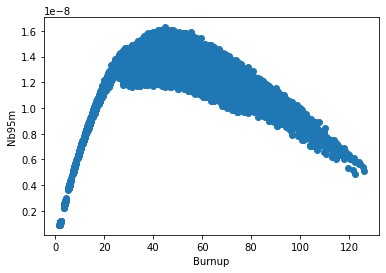

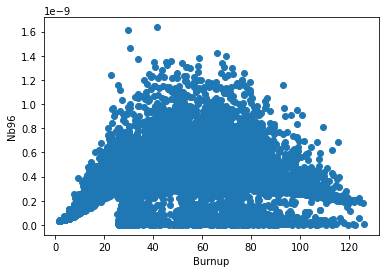

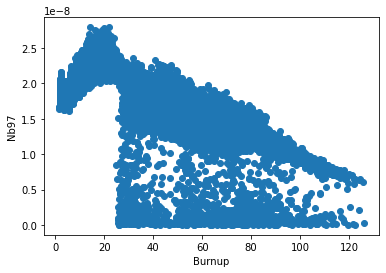

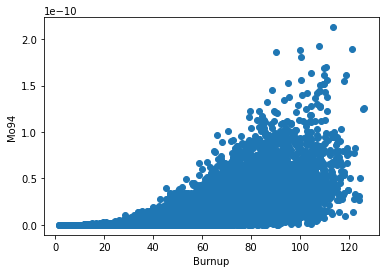

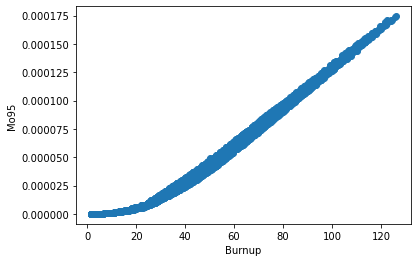

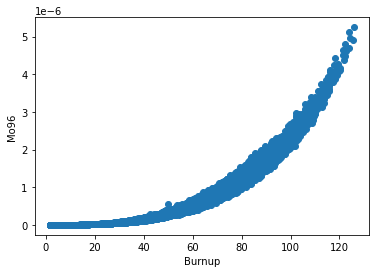

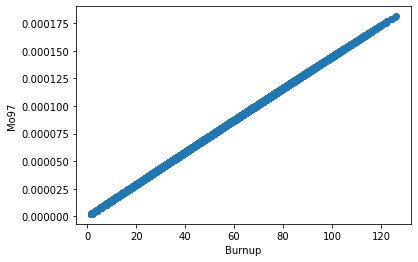

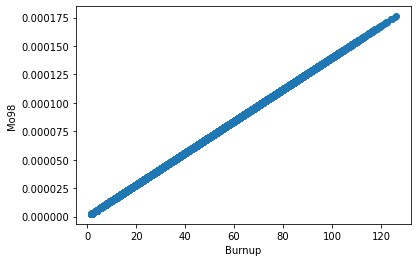

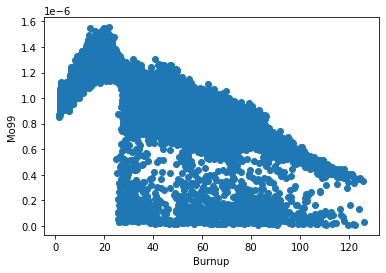

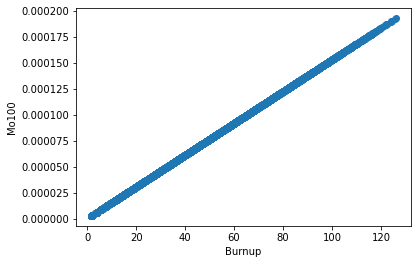

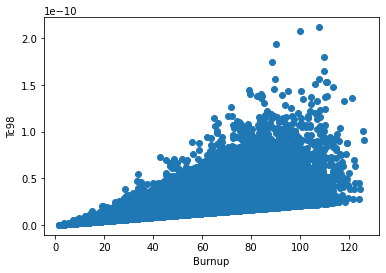

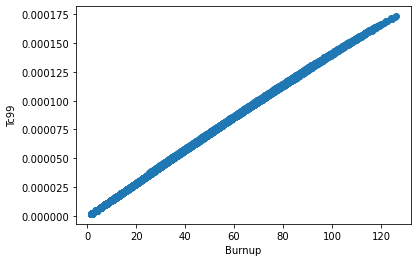

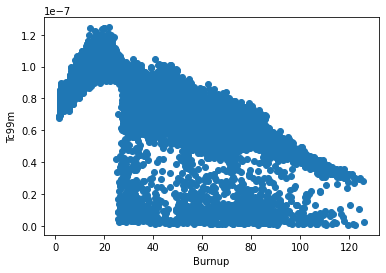

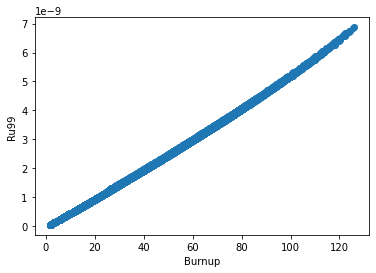

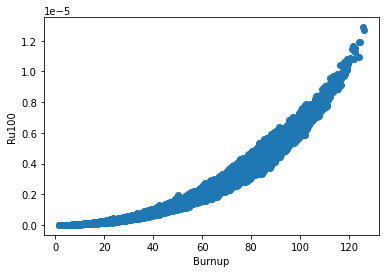

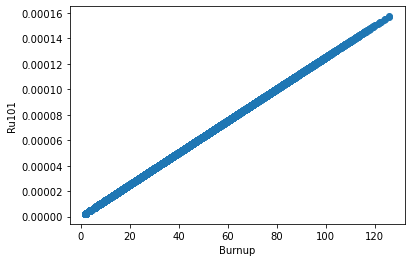

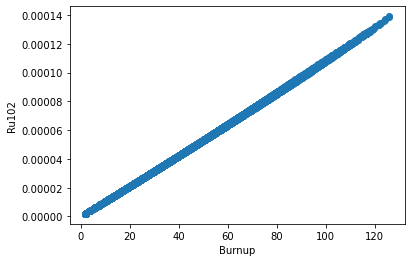

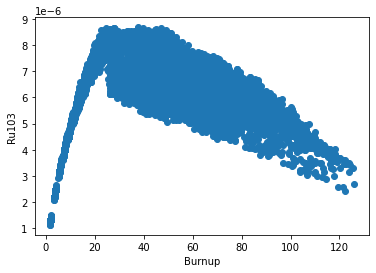

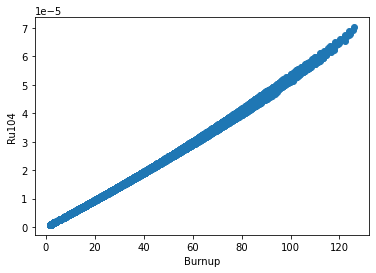

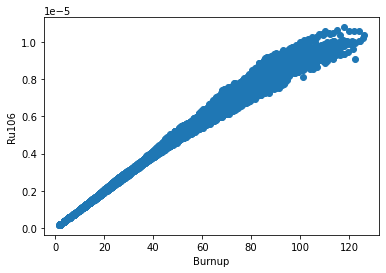

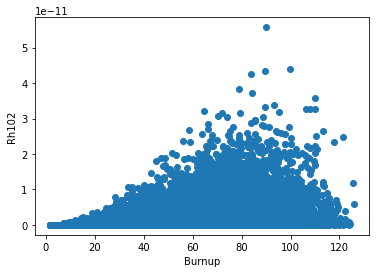

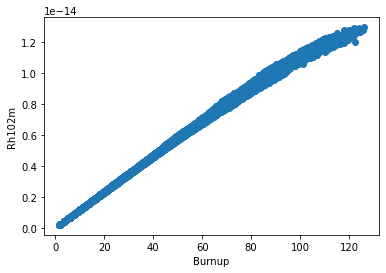

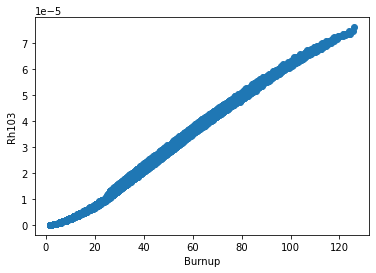

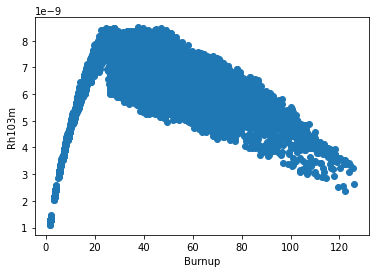

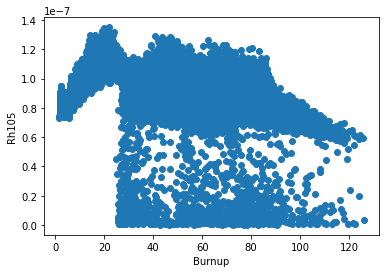

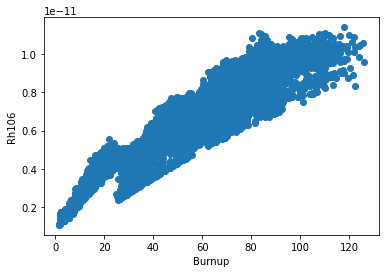

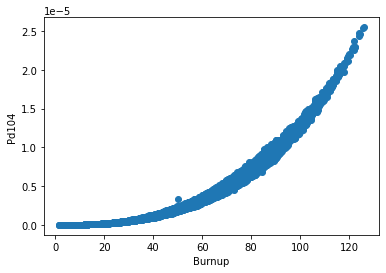

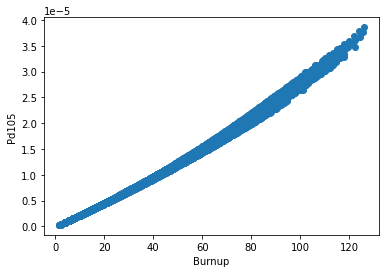

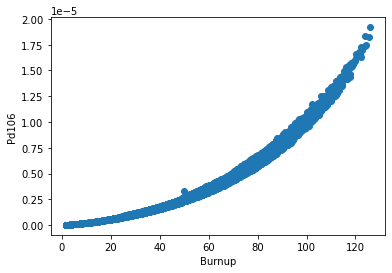

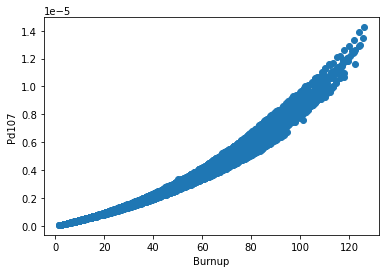

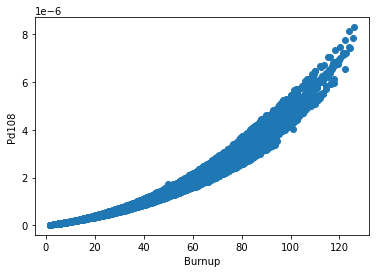

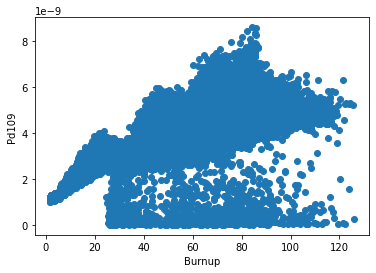

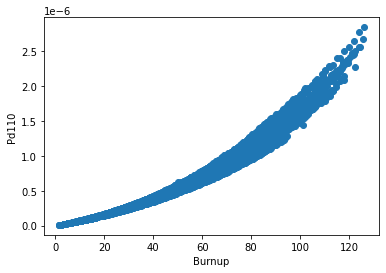

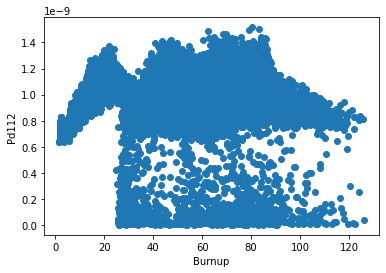

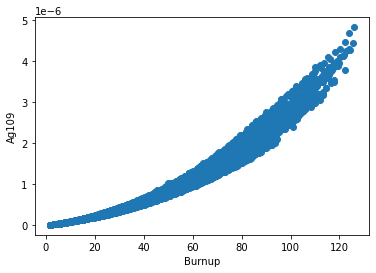

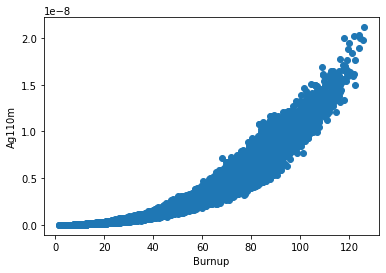

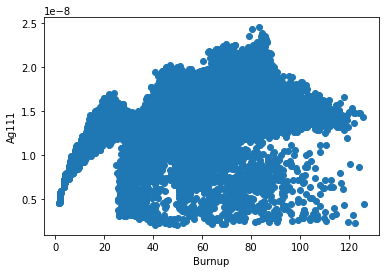

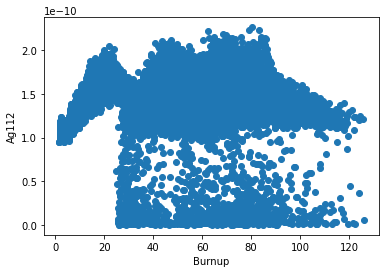

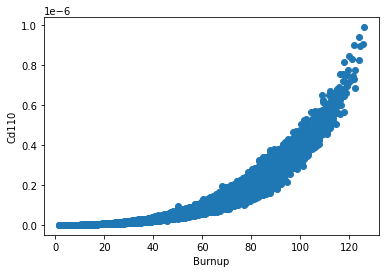

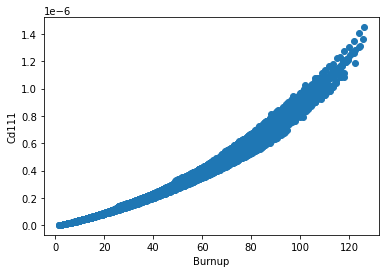

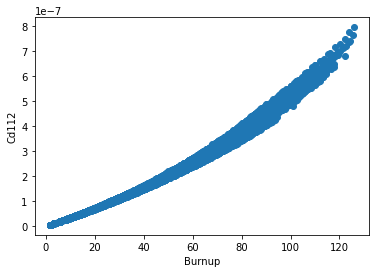

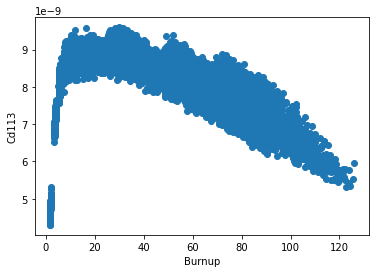

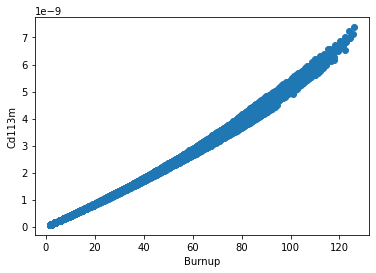

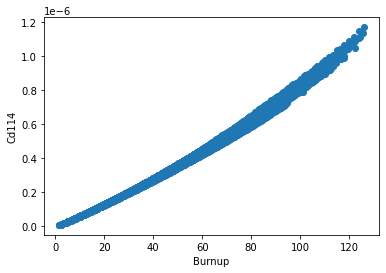

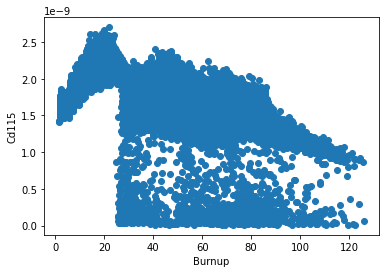

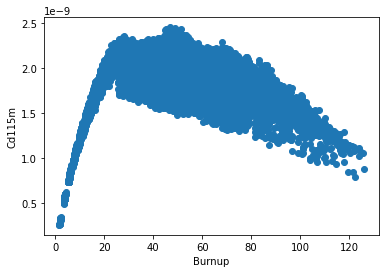

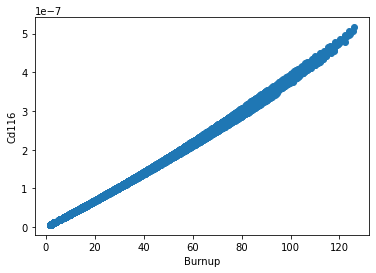

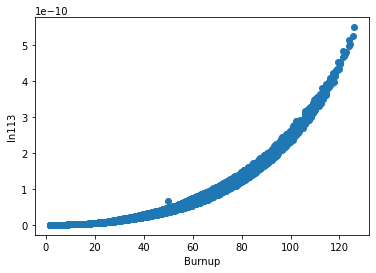

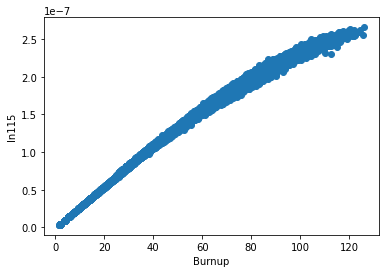

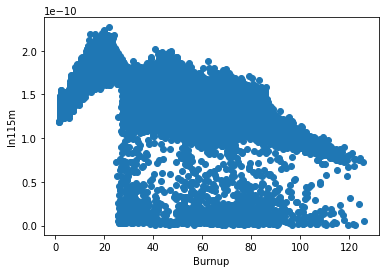

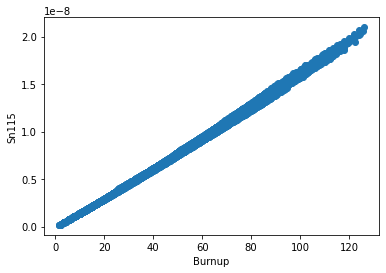

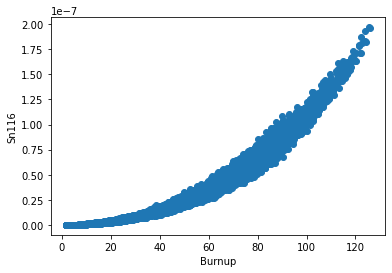

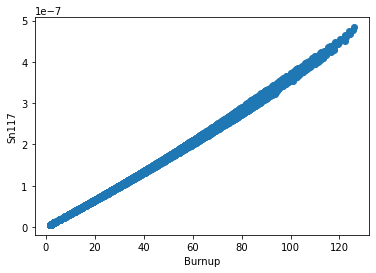

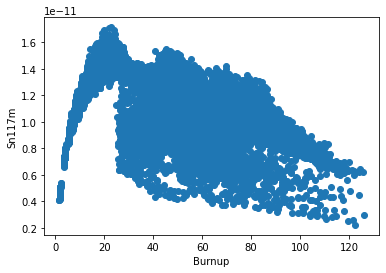

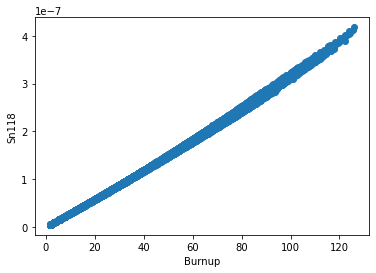

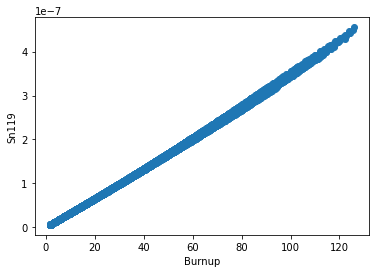

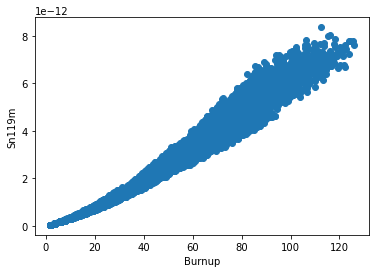

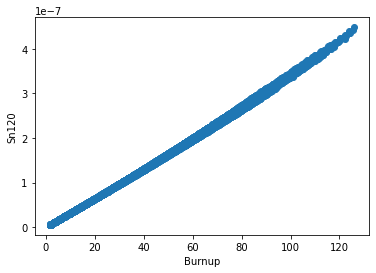

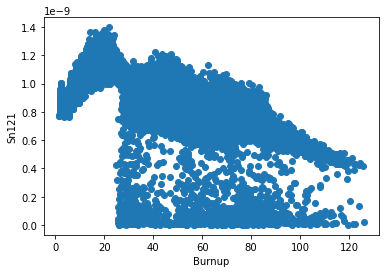

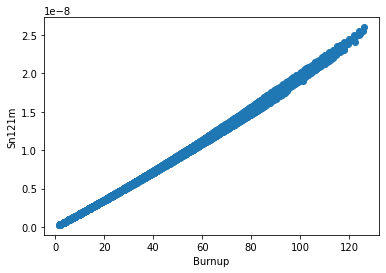

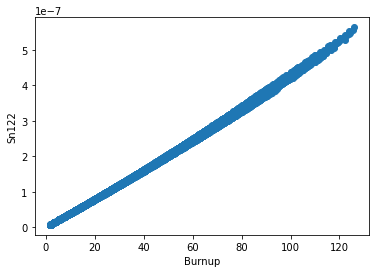

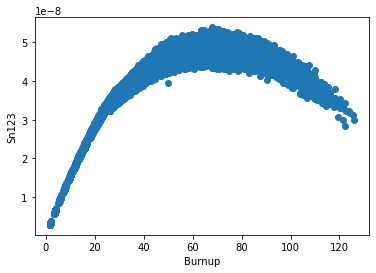

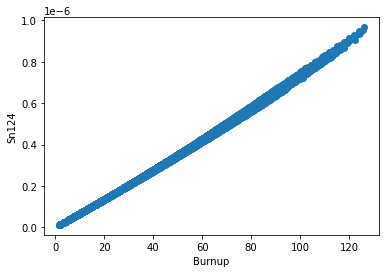

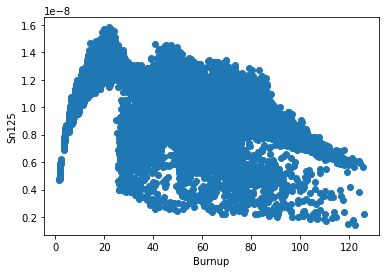

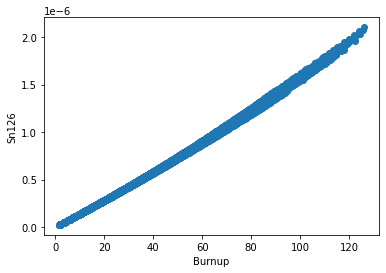

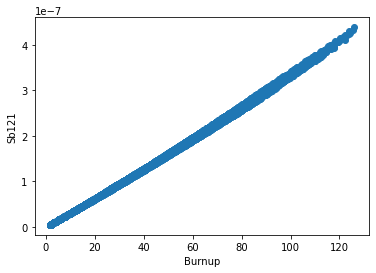

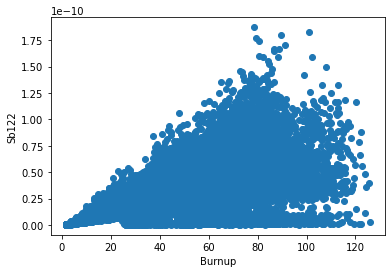

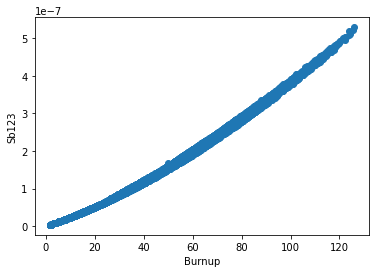

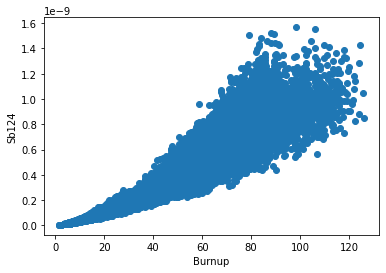

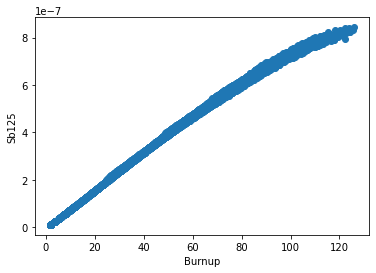

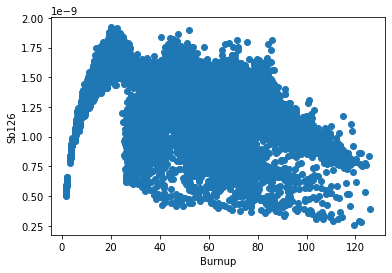

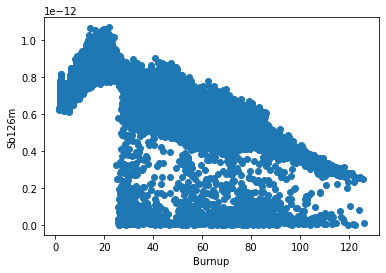

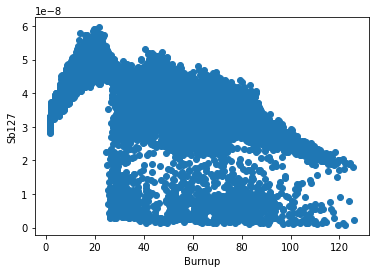

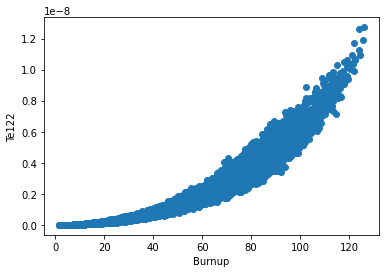

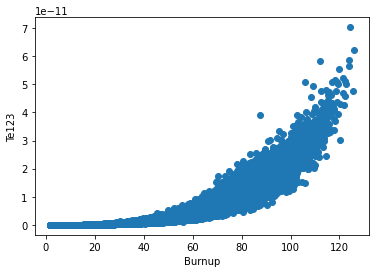

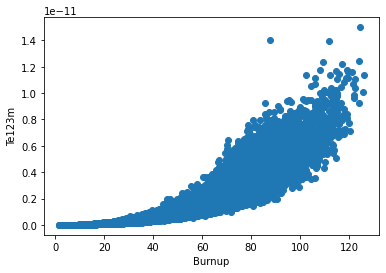

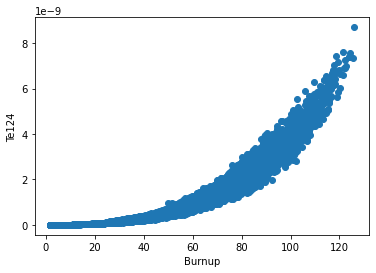

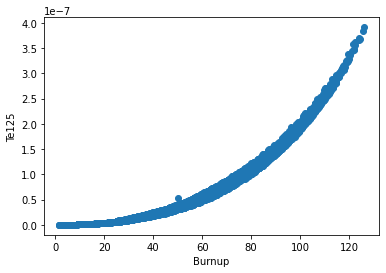

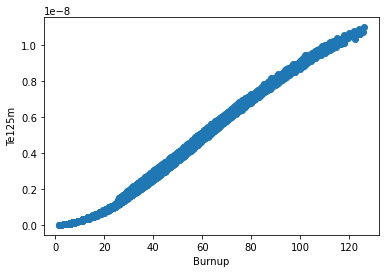

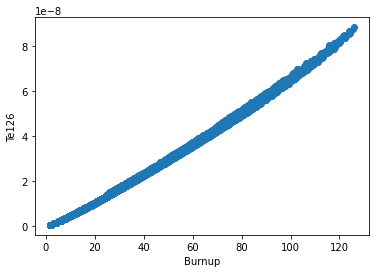

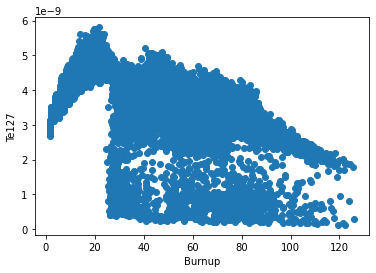

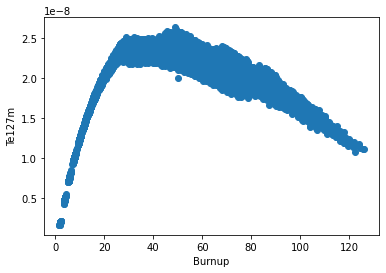

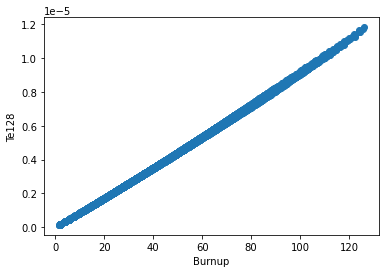

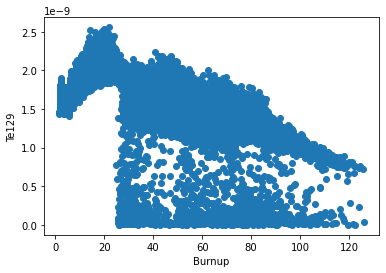

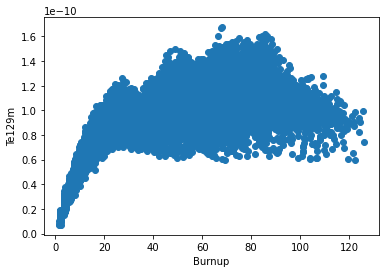

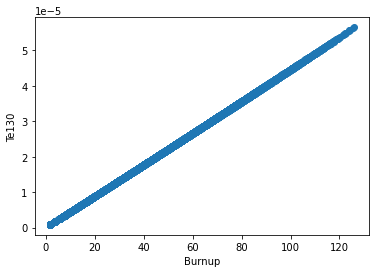

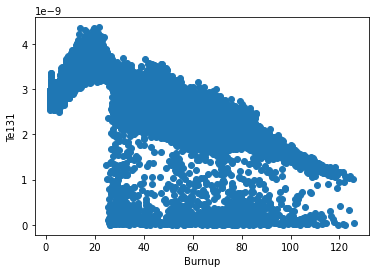

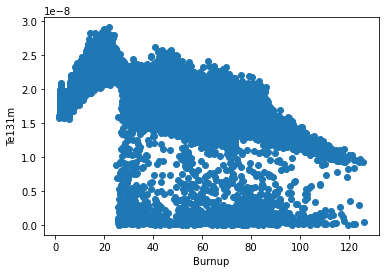

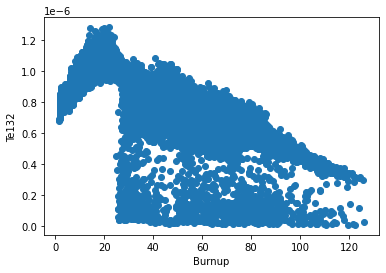

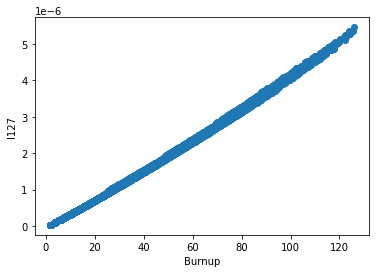

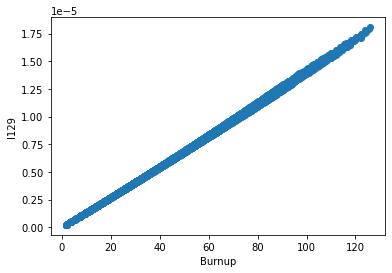

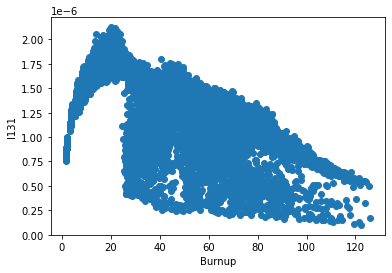

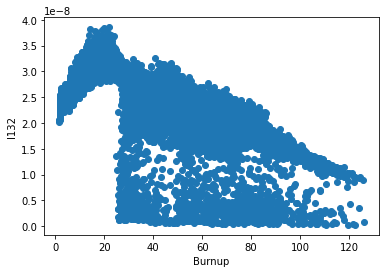

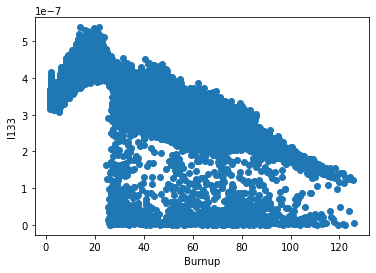

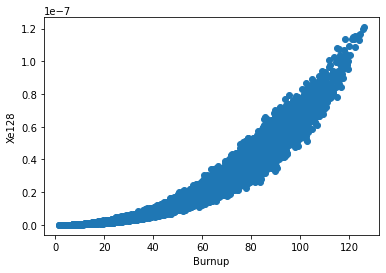

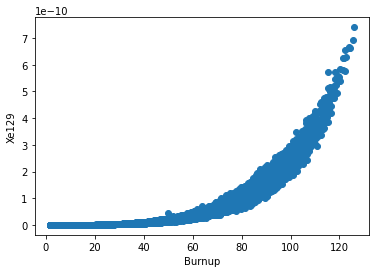

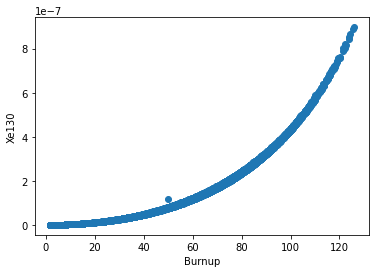

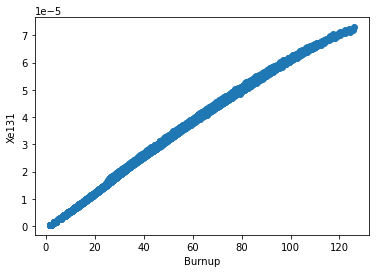

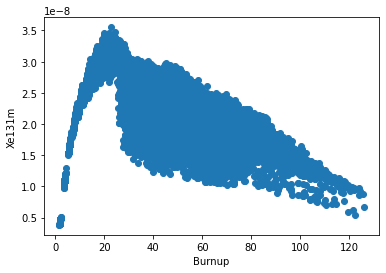

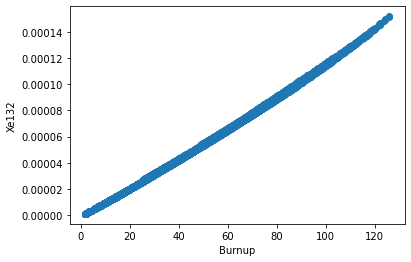

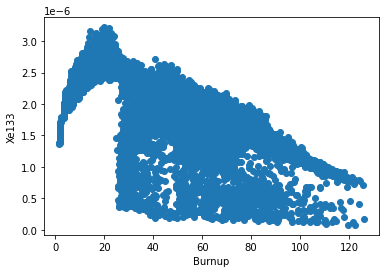

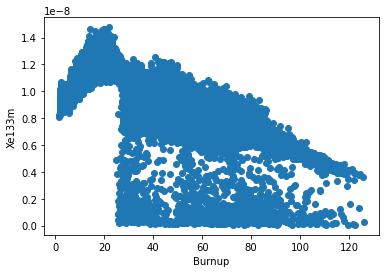

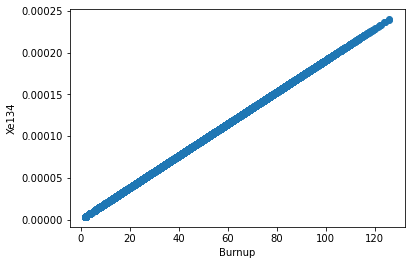

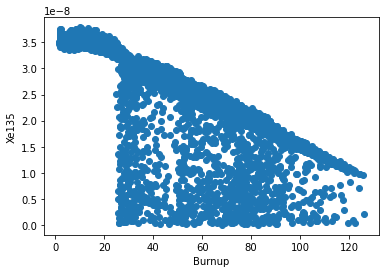

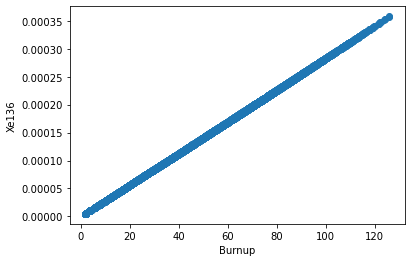

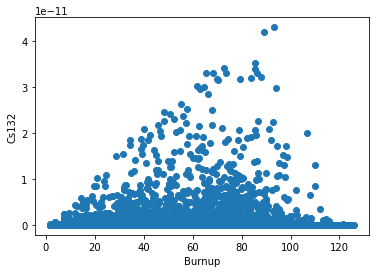

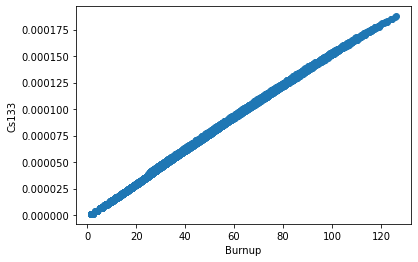

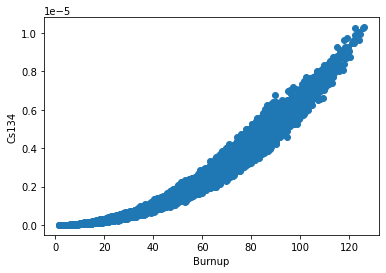

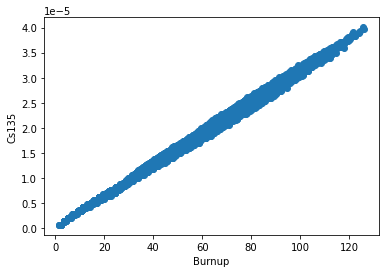

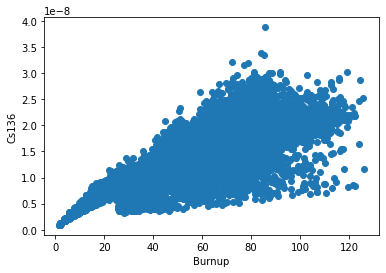

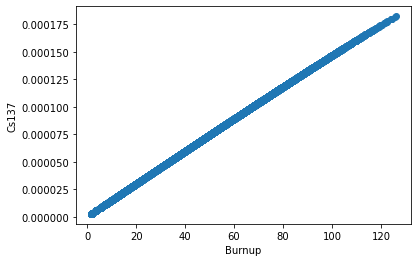

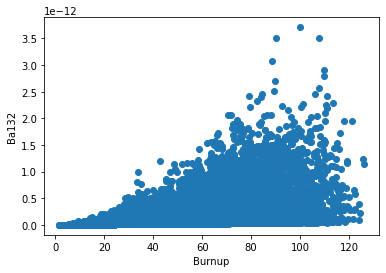

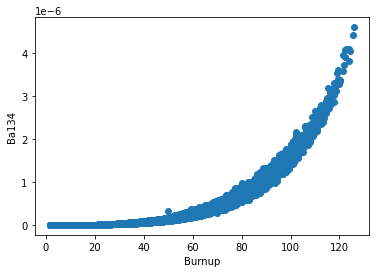

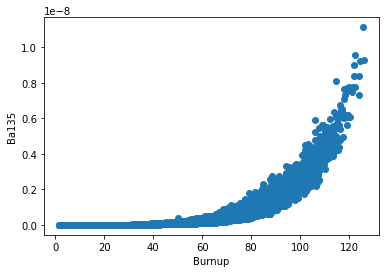

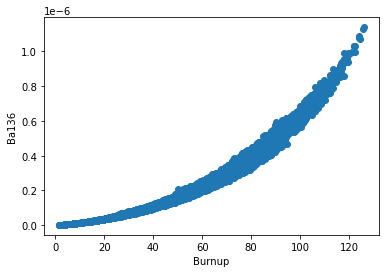

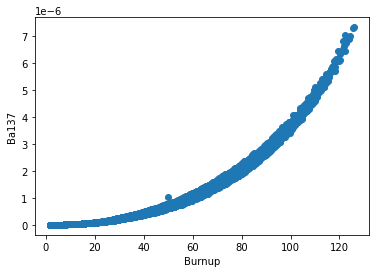

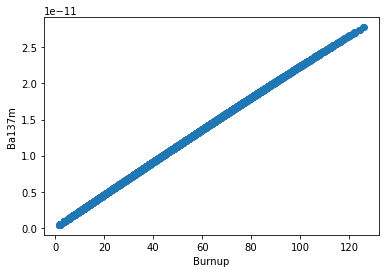

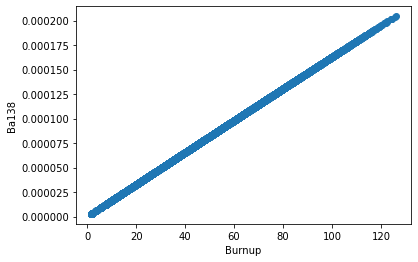

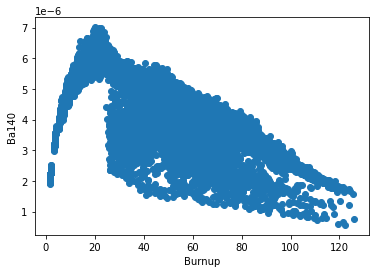

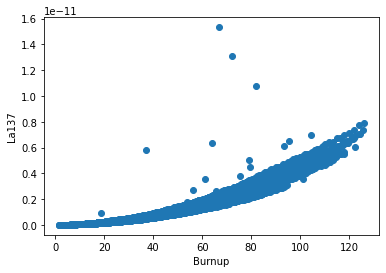

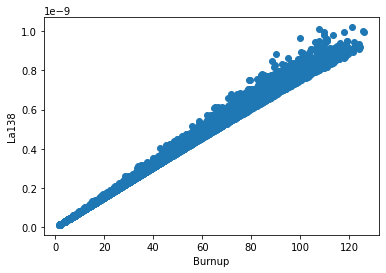

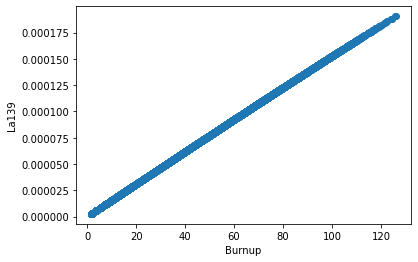

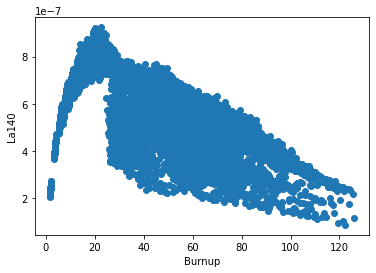

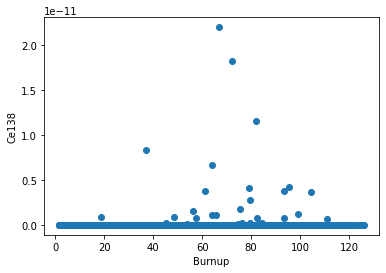

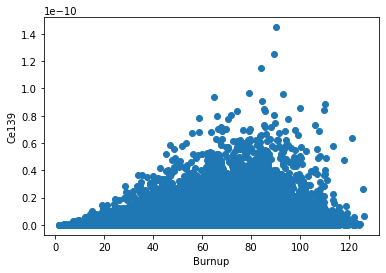

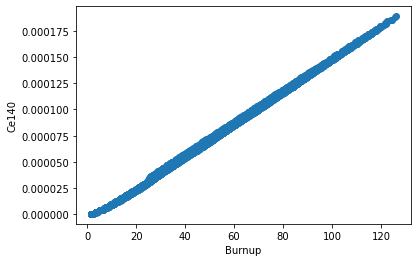

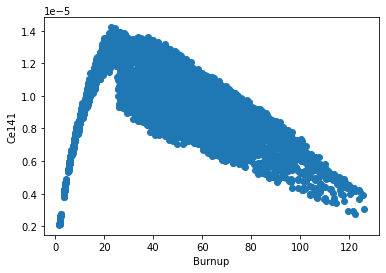

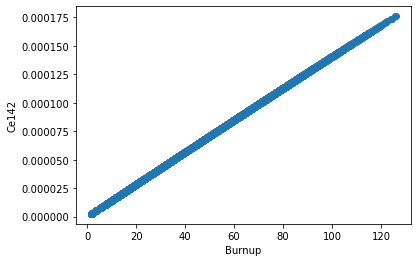

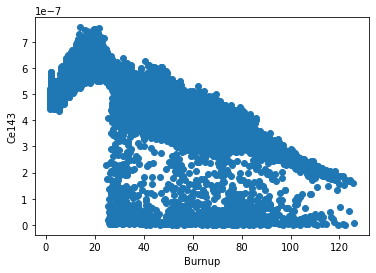

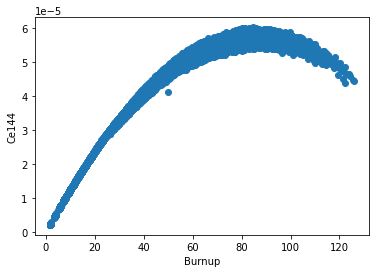

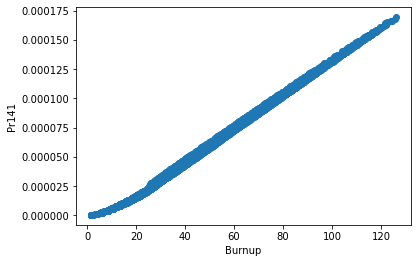

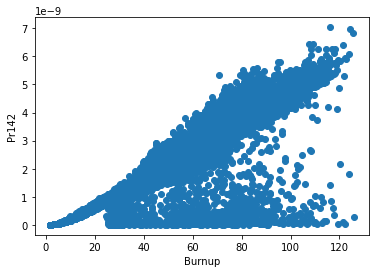

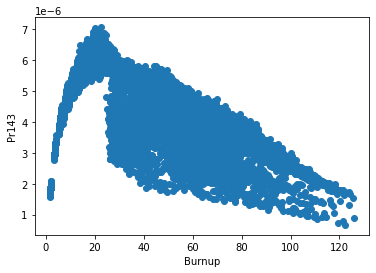

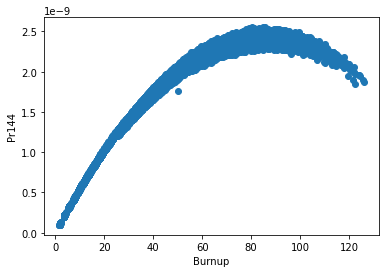

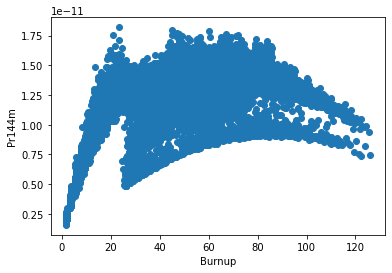

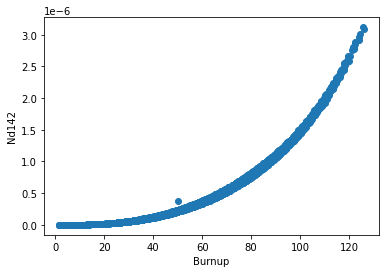

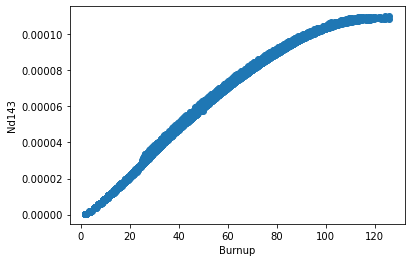

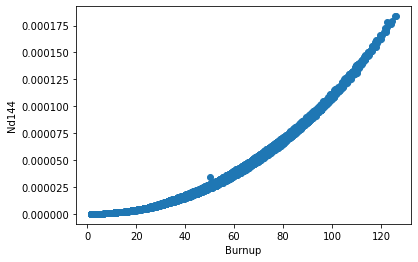

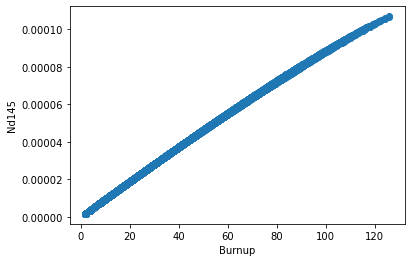

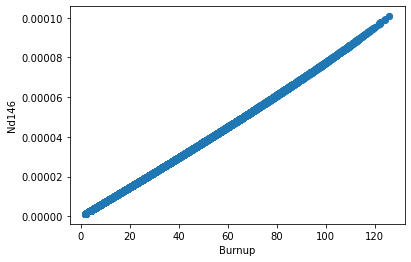

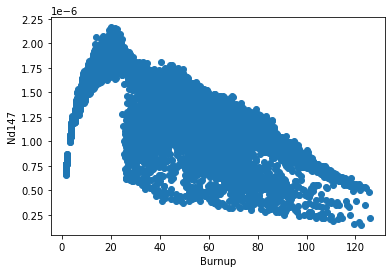

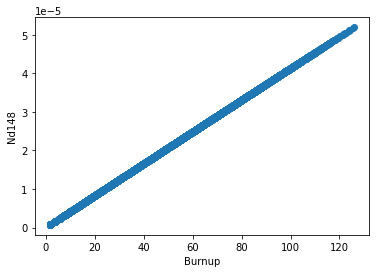

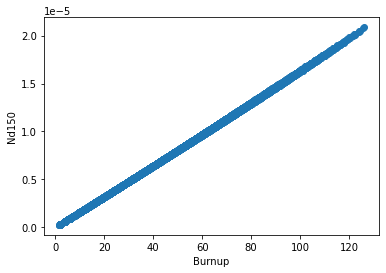

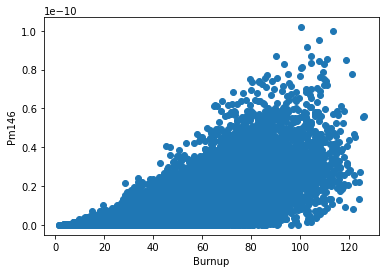

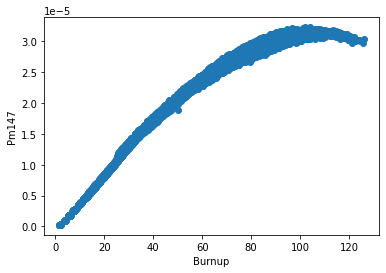

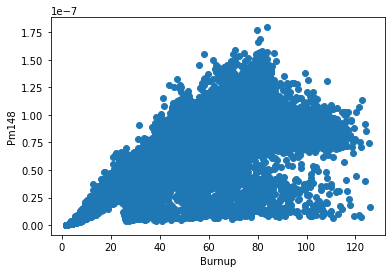

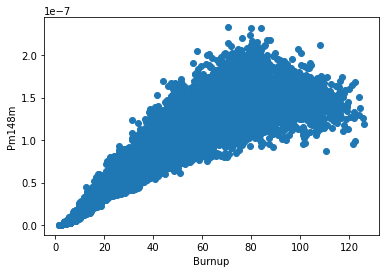

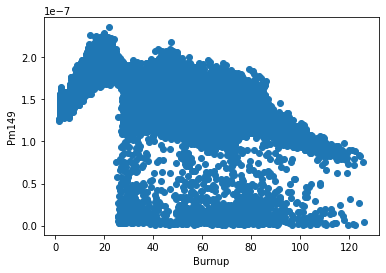

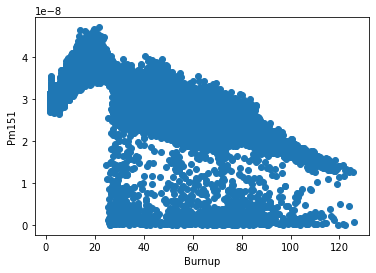

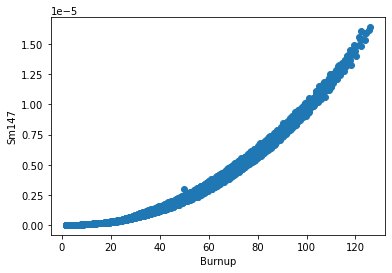

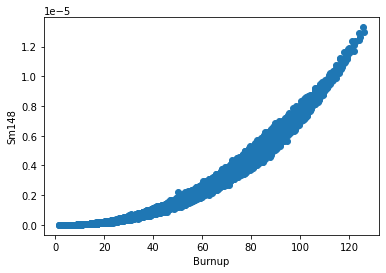

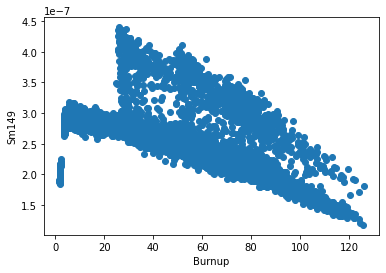

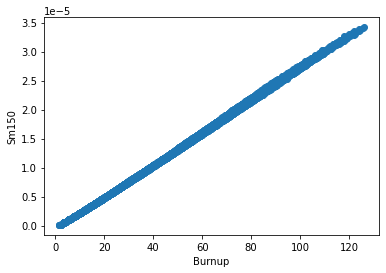

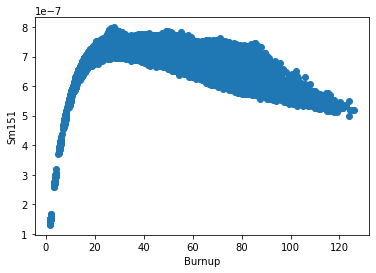

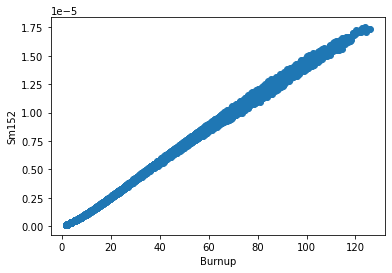

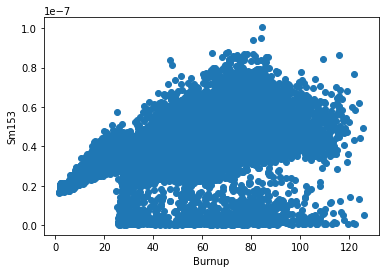

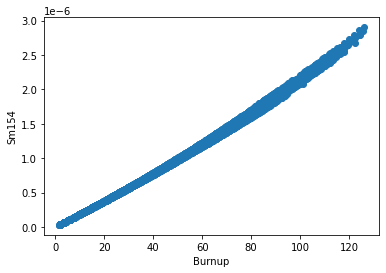

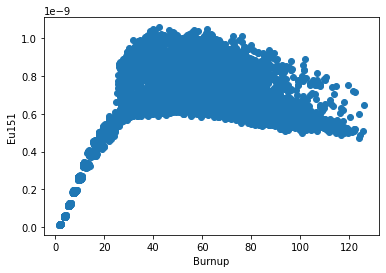

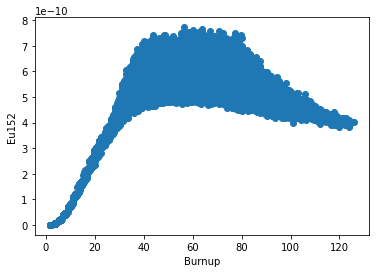

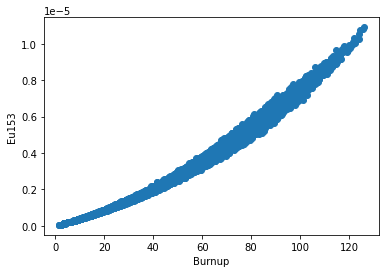

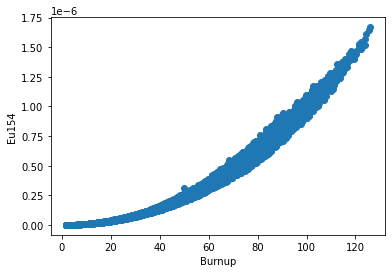

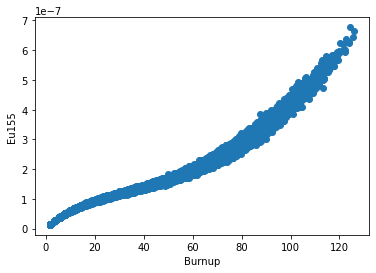

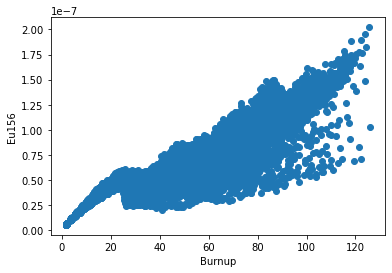

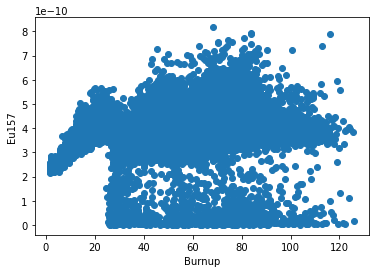

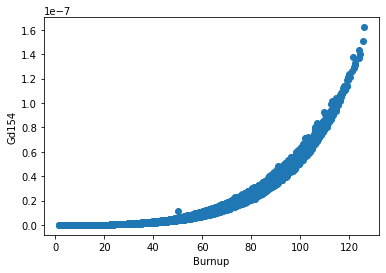

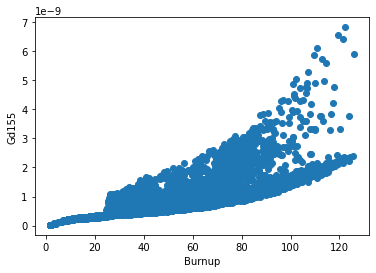

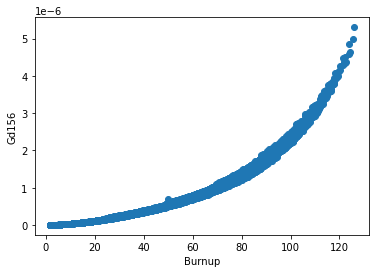

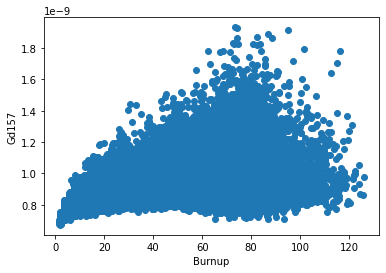

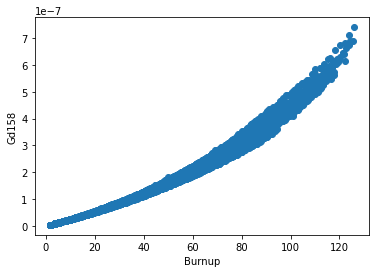

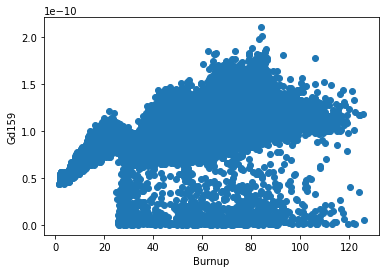

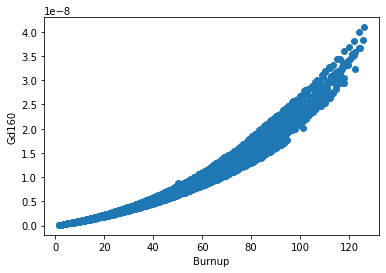

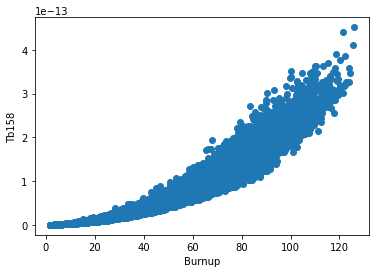

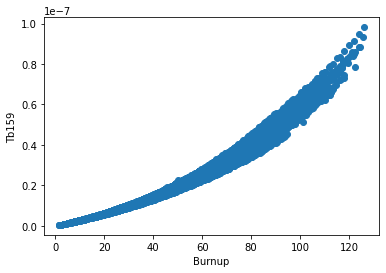

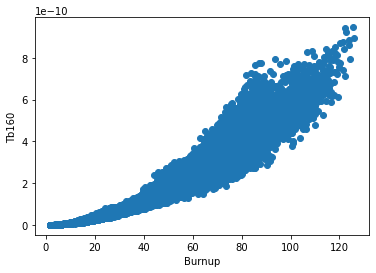

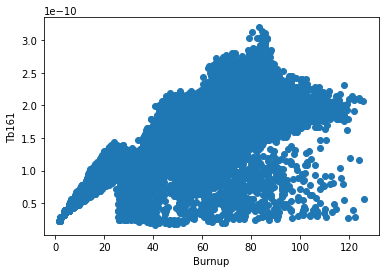

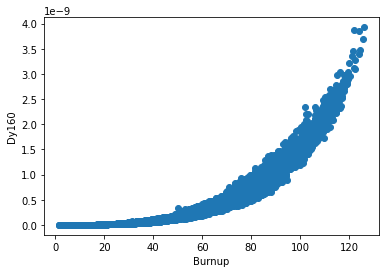

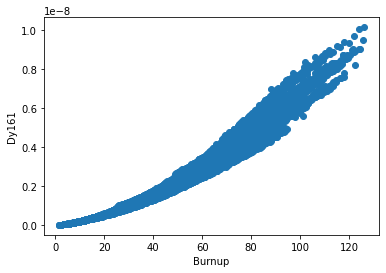

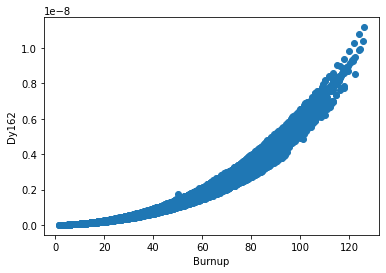

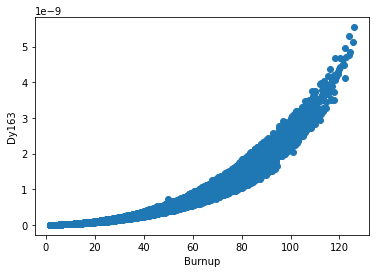

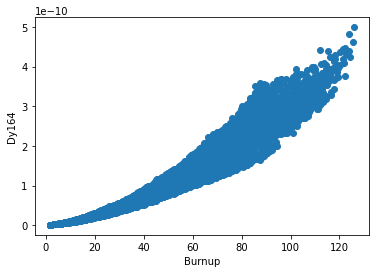

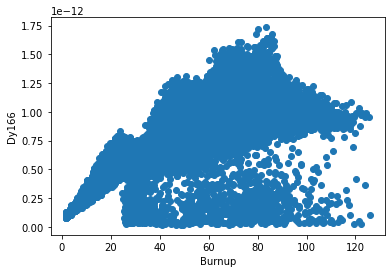

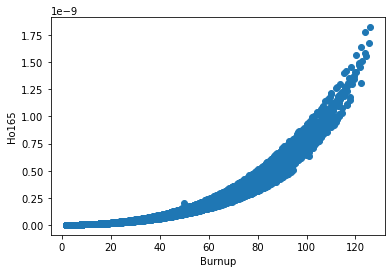

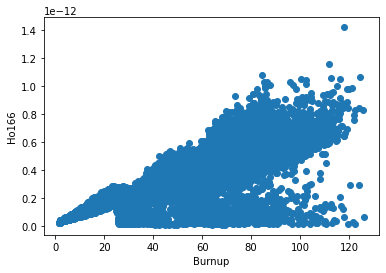

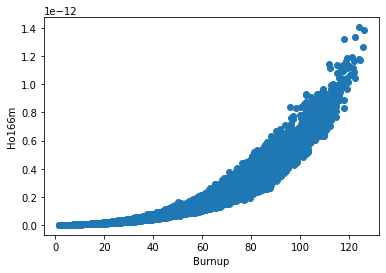

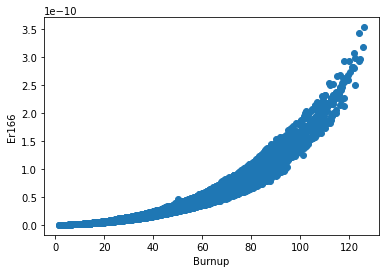

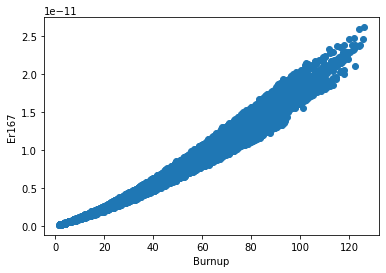

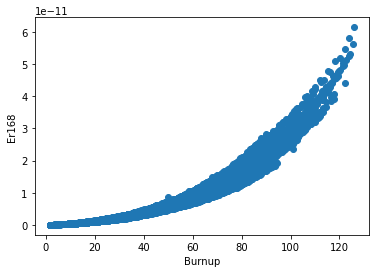

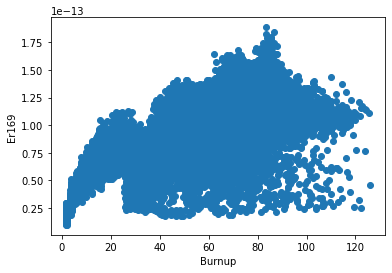

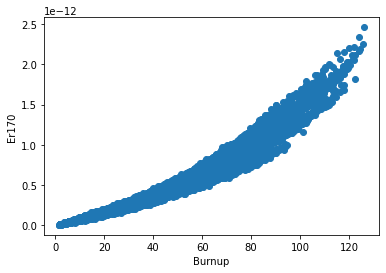

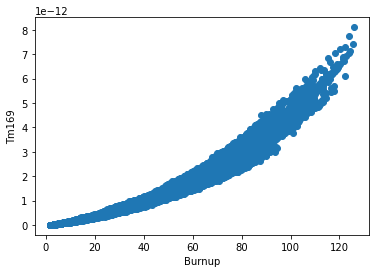

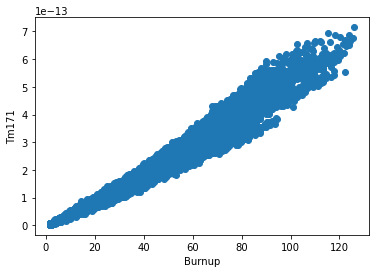

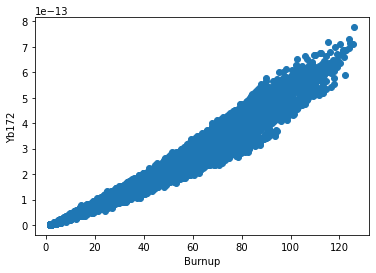

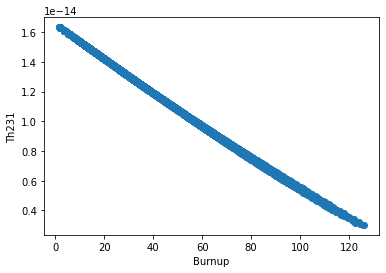

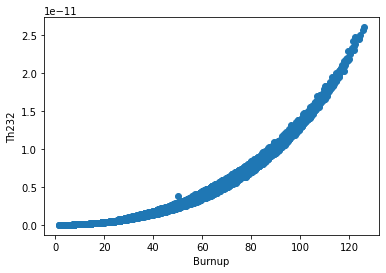

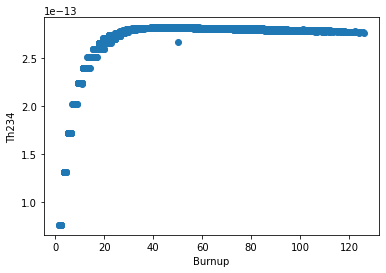

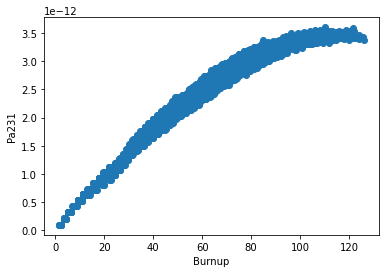

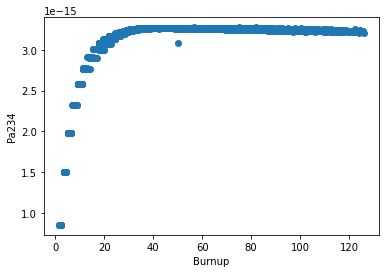

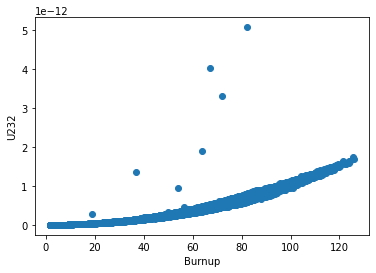

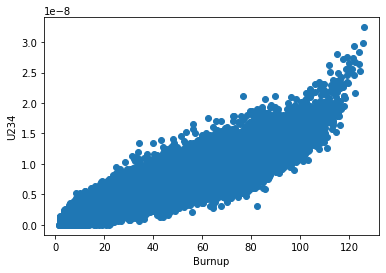

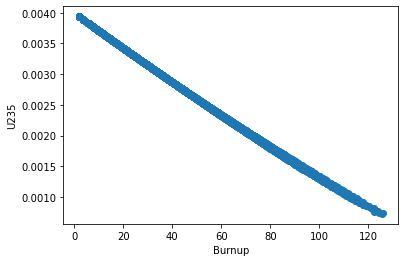

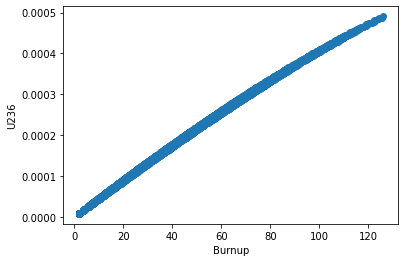

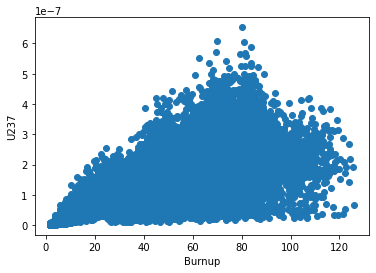

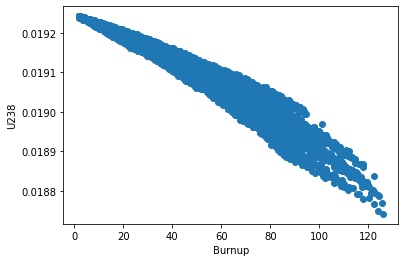

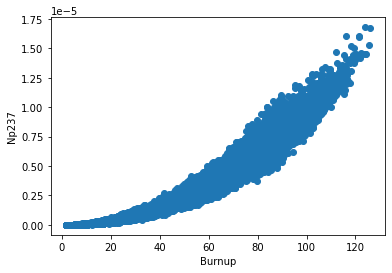

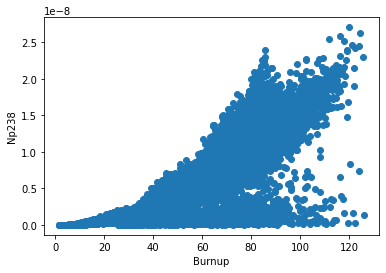

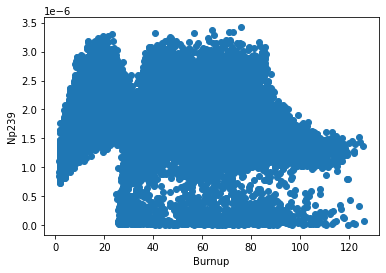

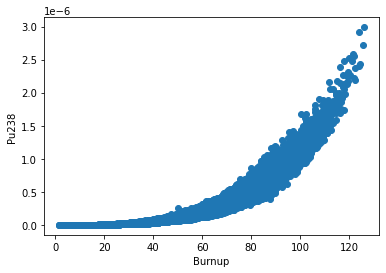

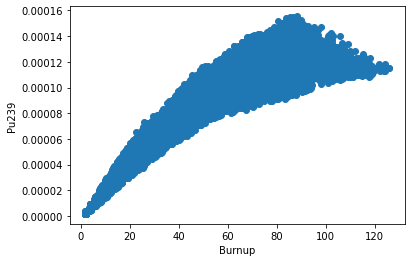

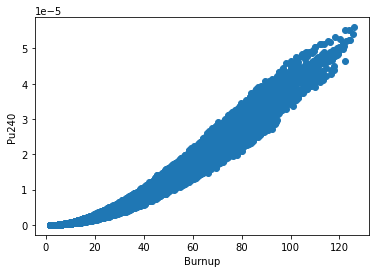

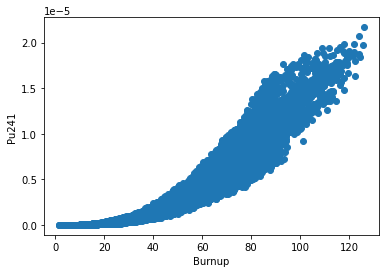

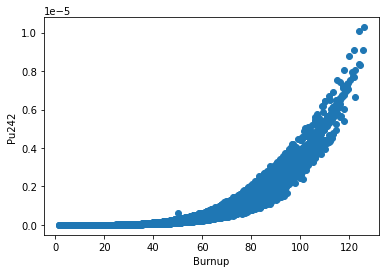

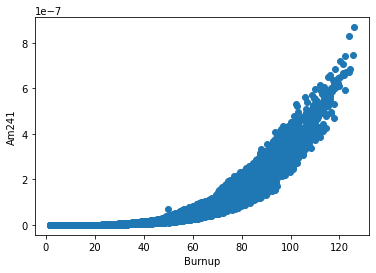

In [13]:
i = 0
for column in strong_corr.columns:
    plt.scatter(df['Burnup [MWd/kg_HM]'], strong_corr[column])
    #plt.plot(df['Burnup [MWd/kg_HM]'], strong_corr[column]*correlations[i], color='red')
    
    plt.xlabel('Burnup')
    plt.ylabel(column)
    i +=1
    plt.show()